# 12팀 드래곤볼 미니 프로젝트 코드
##### 동작 환경 : python 3.9.16

### 0. 데이터 전처리
- 의미 있는 컬럼만 남기기 위해 토의 후 데이터 전처리 하였습니다.

In [2]:
# 라이브러리 로드 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
from datetime import datetime

In [3]:
# 원본 데이터 로드
df = pd.read_csv('./data/eda-proj-fc-purchase.csv')
df

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 1. 1. 오전 12:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022. 1. 1. 오전 12:01:12,-,385000,CARD,385000,-,385000,-
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022. 1. 1. 오전 12:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022. 1. 2. 오전 11:01:24,-,289000,VBANK,289000,-,289000,-


In [4]:
# 판매가격 데이터 타입 변경
sales_price_int = []
sales_prices = df['판매가격'].values
for sales_price in sales_prices:
    if sales_price == '-':
        sales_price_int.append(0)
    else:
        sales_price_int.append(int(sales_price))
sales_price_int
df['판매가격'] = sales_price_int


In [5]:
# 사이트 컬럼 드롭
df.drop(columns = '사이트', inplace = True)

In [6]:
# 거래 id 컬럼 드롭
df.drop(columns = '거래id', inplace = True)

In [7]:
# 코스 id 컬럼 드롭
df.drop(columns = '코스ID', inplace = True)

In [8]:
# 거래일자 전처리 -> datetime format으로 저장
datelist = []
for i in range(0, len(df)):
    if str(df['거래일자'][i]).find('오후') != -1:
        string1 = str(df['거래일자'][i]).replace("오후", "PM")
    else :
        string1 = str(df['거래일자'][i]).replace("오전", "AM")
    
    datelist.append(datetime.strptime(string1, "%Y. %m. %d. %p %I:%M:%S"))
    
df['거래일자'] = datelist

In [9]:
# 월 컬럼 추가
df['월'] = df['거래일자'].dt.month

In [10]:
# 시간대 컬럼 추가
df['시간대'] = df['거래일자'].dt.hour

In [11]:
df.to_csv('./data/실습데이터_수정.csv', index = False)

In [17]:
df = pd.read_csv('./data/실습데이터_수정.csv')

In [18]:
df

,유형,고객id,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,월,시간대
0,PAYMENT,20053,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,-,189000,TRANSFER,159000,-,159000,-,12,22
1,PAYMENT,58309,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,-,501000,TRANSFER,501000,-,501000,-,12,18
2,PAYMENT,18075,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,-,549000,CARD,549000,-,549000,-,12,23
3,PAYMENT,41898,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-,12,23
4,PAYMENT,94328,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,-,239000,CARD,239000,-,239000,-,12,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,PAYMENT,39658,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01 00:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-,1,0
159324,PAYMENT,95136,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,-,385000,CARD,385000,-,385000,-,1,0
159325,PAYMENT,12764,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-,1,0
159326,PAYMENT,19606,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02 11:01:24,-,289000,VBANK,289000,-,289000,-,1,11


### 1. 목표설정
  - 패스트캠퍼스의 미션, 비전을 파악하고, 프로젝트의 큰 목표를 '매출 증대'로 설정했습니다.
  - 매출 증대의 방향성 확립을 위해 네이버 뉴스 크롤링 후 구매빈도와 상관관계를 확인해보았습니다. 
  - 상관관계 확인은 '프로그래밍', '데이터 사이언스', '일러스트' 칼럼으로 한정하였습니다.

##### 1) 네이버 크롤러로 특정 기간 동안 뉴스 데이터 수집

In [ ]:
# -*- coding: utf-8 -*-
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from pprint import pprint
from tqdm.notebook import tqdm
from datetime import date as ddddate

'''''''''''''''''''''''''''''''''''''''''''''''''''''''''
< naver 뉴스 전문 가져오기 >_select 사용
- 네이버 뉴스만 가져와서 결과값 조금 작음 
- 결과 메모장 저장 -> 엑셀로 저장 
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''
RESULT_PATH = './'
now = datetime.now() #파일이름 현 시간으로 저장하기

def get_news(n_url):
    news_detail = []

    breq = requests.get(n_url, headers={'User-Agent':'Mozilla/5.0'})
    bsoup = BeautifulSoup(breq.content)

    title = bsoup.find('h2', class_='media_end_head_headline').text
    news_detail.append(title)

    pdate = bsoup.find('span', class_="media_end_head_info_datestamp_time _ARTICLE_DATE_TIME").text[:11]
    news_detail.append(pdate)

    _text = bsoup.find('div', class_='newsct_article _article_body').get_text().replace('\n', " ")
    _text = _text.replace("    동영상 뉴스   ", "")
    btext = _text.replace("// flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}", "")
    news_detail.append(btext.strip())
  
    news_detail.append(n_url)
    
    pcompany = bsoup.find('div', class_='copyright').find('p', class_='c_text').text
    pcompany = pcompany.split('All rights reserved.')[0].split('Copyright ⓒ')[1].strip()
    news_detail.append(pcompany)

    return news_detail

def crawler(maxpage,query,s_date,e_date):

    crawled_data = {}
    years = []
    company = []
    title = []
    contents = []
    link = []
    s_from = s_date.replace(".","")
    e_to = e_date.replace(".","")
    page = 1
       # 11= 2페이지 21=3페이지 31=4페이지  ...81=9페이지 , 91=10페이지, 101=11페이지

    #f = open(RESULT_PATH + f"contents_text_{query}.txt", 'w', encoding='utf-8-sig')
    
    for page in tqdm(range(1, maxpage+1, 10)):
    
        url = "https://search.naver.com/search.naver?where=news&query="\
            + query + "&sort=2&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom"\
                + s_from + "to" + e_to + "%2Ca%3A&start=" + str(page)
        #https://search.naver.com/search.naver?where=news&query=%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2021.01.01&de=2022.01.01&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20210101to20220101&is_sug_officeid=0
        req = requests.get(url,
                          headers={'User-Agent':'Mozilla/5.0'})
        #print(url)
        cont = req.content
        soup = BeautifulSoup(cont)
        
        for urls in soup.find_all("a", class_="info"):
            try :
                if urls.get_text() == "네이버뉴스":
                    #print(urls["href"])
                    news_detail = get_news(urls["href"])
                        # pdate, pcompany, title, btext
                    #f.write("{}\t{}\t{}\t{}\t{}\n".format(news_detail[1], news_detail[4], news_detail[0], news_detail[2],news_detail[3]))  # new style
                    years.append(news_detail[1])
                    #print(years)
                    company.append(news_detail[4])
                    title.append(news_detail[0])
                    contents.append(news_detail[2])
                    link.append(news_detail[3])
                    
            except Exception as e:
                #print(e)
                continue
        
    crawled_data["years"] = years
    crawled_data["company"] = company
    crawled_data["title"] = title
    crawled_data["contents"] = contents
    crawled_data["link"] = link
    #f.close()
    return crawled_data

def get_maxpage(query, s_date, e_date):
    #https://search.naver.com/search.naver?where=news&sm=tab_pg
    # &query=%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D&sort=0&photo=0
    # &field=0&pd=3&ds=2021.01.01&de=2022.01.01&cluster_rank=23
    # &mynews=0&office_type=0&office_section_code=0&news_office_checked=
    # &nso=so:r,p:from20210101to20220101,a:all&start=1
    s_from = s_date.replace(".","")
    e_to = e_date.replace(".","")
    startrow = 3991
    url = "https://search.naver.com/search.naver?where=news&query="\
            + query + "&sort=2&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom"\
                + s_from + "to" + e_to + "%2Ca%3A&start=" + str(startrow)
    req = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
    #print(url)
    cont = req.content
    soup = BeautifulSoup(cont)
    #print(soup.find(id='snb'))
    not_in_news = soup.find(class_='api_noresult_wrap')
    #print(not_in_news)
    while True:
        if (startrow == 3991) & (not_in_news == None):
            break

        if not_in_news != None:
            #print(1)
            startrow = startrow - 100
            url = "https://search.naver.com/search.naver?where=news&query="\
            + query + "&sort=2&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom"\
                + s_from + "to" + e_to + "%2Ca%3A&start=" + str(startrow)
            req = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
            cont = req.content
            soup = BeautifulSoup(cont)
            not_in_news = soup.find(class_='api_noresult_wrap')


        if not_in_news == None:
            #print(2)
            while True:
                startrow = startrow + 10
                url = "https://search.naver.com/search.naver?where=news&query="\
                    + query + "&sort=2&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom"\
                        + s_from + "to" + e_to + "%2Ca%3A&start=" + str(startrow)
                req = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
                cont = req.content
                soup = BeautifulSoup(cont)
                not_in_news = soup.find(class_='api_noresult_wrap')
                if not_in_news != None:
                    startrow = startrow -10
                    url = "https://search.naver.com/search.naver?where=news&query="\
                    + query + "&sort=2&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom"\
                        + s_from + "to" + e_to + "%2Ca%3A&start=" + str(startrow)
                    req = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
                    cont = req.content
                    soup = BeautifulSoup(cont)
                    not_in_news = soup.find(class_='api_noresult_wrap')
                    break
        #print('startrow = ',startrow)
        if not_in_news == None:
            #print(3)
            break
    maxpage = startrow
    print(maxpage)
    return maxpage
    
def csv_make(crawled_data):
    xlsx_outputFileName = f'{query}_뉴스({s_date}~{e_date}).csv'
    crawled_data.to_csv(RESULT_PATH+xlsx_outputFileName, index=False)



maxpage = 400#input("최대 출력할 페이지수 입력하시오: ")
#if not maxpage.isdigit():
    #maxpage = 400#input("최대 출력할 페이지수 입력하시오: ")
query = '프로그래밍'#input("검색어 입력: ")
s_date = '2021.01.01'#input("시작날짜 입력(ex) 2023.01.01):")
e_date = '2023.01.01'#input("끝날짜 입력(ex) 2023.05.08):")
#맥스 페이지를 구하는 함수를 적용시켜서 자동으로 맥스 페이지를 구한다.

start_date = ddddate(int(s_date.split(".")[0]), int(s_date.split(".")[1]), int(s_date.split(".")[2]))
end_date = ddddate(int(e_date.split(".")[0]), int(e_date.split(".")[1]), int(e_date.split(".")[2]))
current_date = start_date

sd_infor = start_date
if sd_infor.month != 12:
    ed_infor = sd_infor.replace(month=sd_infor.month +1)
else:
    ed_infor = sd_infor.replace(year=sd_infor.year+1, month=1)

all_news_data = {}
all_news_data["years"] = []
all_news_data["company"] = []
all_news_data["title"] = []
all_news_data["contents"] = []
all_news_data["link"] = []
while current_date < end_date:
    print(2)
    # 원하는 작업 수행
    # 예: 현재 월 출력
    
    print("시작 날짜 : ",sd_infor,"\n종료 날짜 : ",ed_infor,"\n")

    maxpage = get_maxpage(query, sd_infor.strftime("%Y.%m.%d"), ed_infor.strftime("%Y.%m.%d"))
    print("maxpage done-----------")
    crawled_data = crawler(maxpage,query,sd_infor.strftime("%Y.%m.%d"),ed_infor.strftime("%Y.%m.%d"))
    print("crawled_data done---------------")
    print(current_date.strftime("%Y-%m"))
    all_news_data['years'].extend(crawled_data['years'])
    all_news_data['company'].extend(crawled_data['company'])
    all_news_data['title'].extend(crawled_data['title'])
    all_news_data['contents'].extend(crawled_data['contents'])
    all_news_data['link'].extend(crawled_data['link'])

    # 다음 달로 이동
    if current_date.month == 12:
        current_date = current_date.replace(year=current_date.year + 1, month=1)
        sd_infor = current_date
        ed_infor = sd_infor.replace(month=sd_infor.month +1)
    else:
        current_date = current_date.replace(month=current_date.month + 1)
        sd_infor = current_date
        if sd_infor.month == 12:
            ed_infor = sd_infor.replace(year=ed_infor.year+1, month=1)
        else:
            ed_infor = sd_infor.replace(month=sd_infor.month +1)

#print(start_date)
#print(end_date)
df = pd.DataFrame(all_news_data)
drop_df = df.sort_values('years').drop_duplicates('title')


#crawled_data = crawler(maxpage,query,s_date,e_date) #검색된 네이버뉴스의 기사내용을 크롤링합니다. 
csv_make(drop_df) #엑셀로 만들기

In [ ]:
df = pd.read_csv('./프로그래밍_뉴스_(2021.01.01_2023.01.01).csv')
df.info()

##### 2) 크롤러 데이터와 실습 데이터 사이 상관관계 분석

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [20]:
def to_newscounts_counts(fc_df, news_df, category):

    fc_df_pro = fc_df[fc_df['카테고리'] == category]
    fc_df_pro = fc_df_pro.reset_index()
    datetime_list = []
    for i in range(0, len(fc_df_pro)):
        dts_use = datetime.strptime(str(fc_df_pro['거래일자'][i]), "%Y-%m-%d %H:%M:%S")
        datetime_list.append(dts_use)
    fc_df_pro['거래일자'] = datetime_list

    # 구해서 pro_2022에 저장했음
    fc_df_pro['거래일자'].dt.month.value_counts().sort_index()
    pro_2022 = fc_df_pro['거래일자'].dt.month.value_counts().sort_index()

    # 2021년 1월부터 12월까지의 월 단위 인덱스 생성
    period_range = pd.period_range(start='2022-01', end='2022-12', freq='M')
    # 데이터프레임 생성
    # 인덱스 설정
    pro_2022 = pro_2022.to_frame()
    pro_2022['날짜'] = period_range
    pro_2022 = pro_2022.set_index('날짜')

    #그 전에 years컬럼을 날짜로 바꾸고 년과 월 데이터만 살리고 일은 버린다. 필요없으니까 혹은 그냥 살릴까?
    #살리자 혹시 모르니
    datetime_list = []
    for i in range(0, len(news_df)):
        dts_use = datetime.strptime(news_df['years'][i], "%Y.%m.%d.")
        datetime_list.append(dts_use)
    news_df['years'] = datetime_list

    date_list = []
    for i in range(0, len(news_df)):
        if news_df['years'].dt.month[i] < 10:
            dt_use = f"{news_df['years'].dt.year[i]}-0{news_df['years'].dt.month[i]}"
        else:
            dt_use = f"{news_df['years'].dt.year[i]}-{news_df['years'].dt.month[i]}"
        date_list.append(dt_use)
    news_df['거래년월'] = date_list
    news_df_m = news_df['거래년월'].value_counts().sort_index()

    #인덱스 날짜를 기준으로 6개월전 부터 전월까지 뉴스를 모두 더한 후 컬럼에 저장
    sum_news_list = []
    for i in range(0, len(pro_2022)):
        month = 6
        column_date = datetime.strptime(str(pro_2022.index[i]), "%Y-%m")
        start_date = column_date - relativedelta(months=month)
        period_range = pd.period_range(start_date, column_date - relativedelta(months=1), freq='M')
        period_range = [period.strftime('%Y-%m') for period in period_range]
        sum_news = news_df_m[news_df_m.index.isin(period_range)].sum()
        sum_news_list.append(sum_news)

    pro_2022['news_count'] = sum_news_list
    return pro_2022

In [21]:
# 현재 프로그래밍 카테고리에서 2022년도 월별 판매량을 구한다
fc_df = pd.read_csv('./data/실습데이터_수정.csv')
pro_news_df = pd.read_csv('./data/프로그래밍_뉴스_(2021.01.01~2023.01.01).csv')
dasa_news_df = pd.read_csv('./data/데이터 사이언스_뉴스(2021.01.01~2023.01.01).csv')
li_news_df = pd.read_csv('./data/일러스트_뉴스(2021.01.01~2023.01.01).csv')
# video_news_df = pd.read_csv('./영상,3D_뉴스(2021.01.01~2023.01.01).csv')
# work_news_df = pd.read_csv("./업무 생산성_뉴스(2021.01.01~2023.01.01).csv")
# marketing_news_df = pd.read_csv("./마케팅_뉴스(2021.01.01~2023.01.01).csv")
# real_news_df = pd.read_csv("./부동산, 금융_뉴스(2021.01.01~2023.01.01).csv")

fc_df['카테고리'].value_counts()

프로그래밍       51705
데이터 사이언스    26859
일러스트        15443
영상/3D       13923
업무 생산성      13916
마케팅         12896
부동산/금융      10797
디자인         10211
투자/재테크       2483
부업/창업        1094
크리에이티브          1
Name: 카테고리, dtype: int64

In [22]:
# 함수를 실행하여 각 카테고리별 뉴스 빈도를 각 카테고리별 새로운 데이터프레임에 삽입.
pro_2022 = to_newscounts_counts(fc_df, pro_news_df, "프로그래밍")
dasa_2022 = to_newscounts_counts(fc_df, dasa_news_df, "데이터 사이언스")
li_2022 = to_newscounts_counts(fc_df, li_news_df, "일러스트")


In [23]:
# 6개월간 '프로그래밍', '데이터 사이언스', '일러스트' 뉴스 빈도와 각카테고리간 상관관계
pro_2022.corr() #0.587481
dasa_2022.corr() # 0.158235
li_2022.corr() # 0.708272


,거래일자,news_count
거래일자,1.000000,0.708272
news_count,0.708272,1.000000


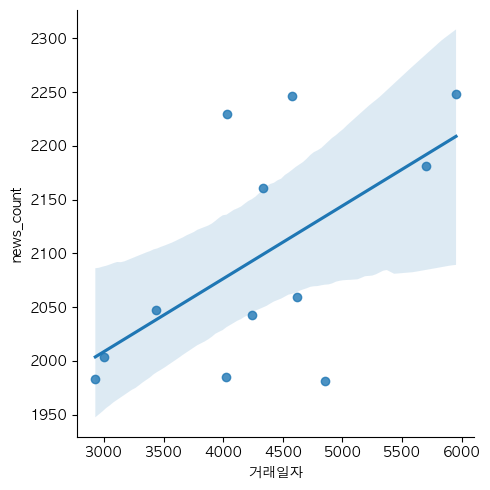

In [24]:
# 6개월간 '프로그래밍' 뉴스 빈도와 '프로그래밍' 카테고리간 상관관계
sns.lmplot(x='거래일자', y='news_count', data=pro_2022)

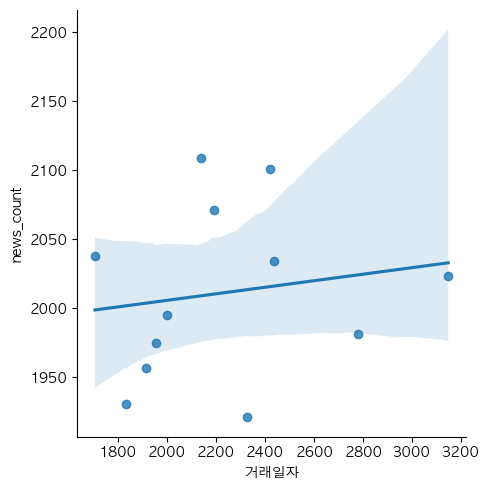

In [25]:
# 6개월간 '데이터 사이언스' 뉴스 빈도와 '데이터 사이언스' 카테고리간 상관관계
sns.lmplot(x='거래일자', y='news_count', data=dasa_2022)

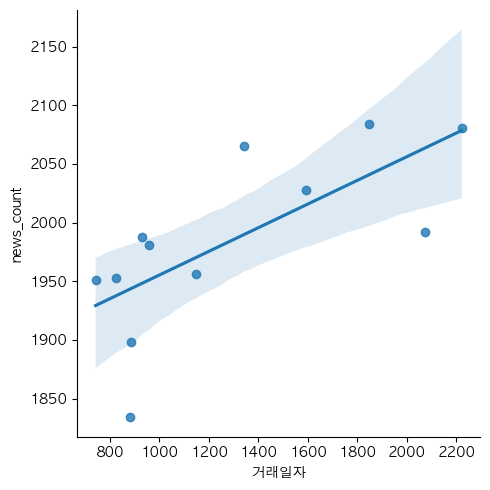

In [26]:
# 6개월간 '일러스트' 뉴스 빈도와 '일러스트' 카테고리간 상관관계
sns.lmplot(x='거래일자', y='news_count', data=li_2022)

In [27]:
# 세 카테고리를 합한 데이터프레임 생성하고 상관관계계수 확인

all_2022 = pd.concat([pro_2022, dasa_2022, li_2022])

all_2022.corr()


,거래일자,news_count
거래일자,1.000000,0.668776
news_count,0.668776,1.000000


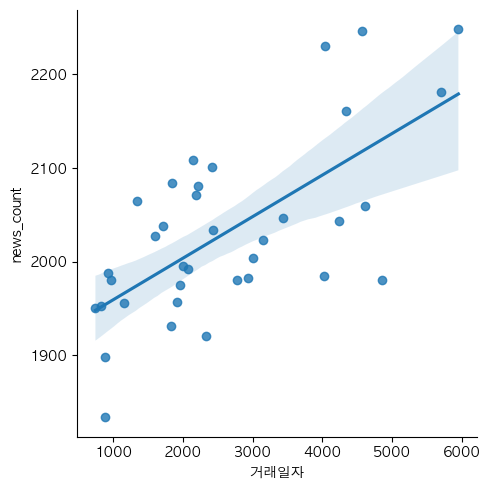

In [28]:
# 세 카테고리를 합한 데이터(뉴스량과 뉴스 6개월 이후 수강빈도) 상관관계 그래프 출력
sns.lmplot(x='거래일자', y='news_count', data=all_2022)

### 2. 목표 재설정 후 데이터 분석


##### 0) 라이브러리 및 전처리한 데이터 로드

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
from datetime import datetime

In [30]:
df = pd.read_csv('./data/실습데이터_수정.csv', parse_dates=["거래일자"])
df

,유형,고객id,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,월,시간대
0,PAYMENT,20053,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,-,189000,TRANSFER,159000,-,159000,-,12,22
1,PAYMENT,58309,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,-,501000,TRANSFER,501000,-,501000,-,12,18
2,PAYMENT,18075,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,-,549000,CARD,549000,-,549000,-,12,23
3,PAYMENT,41898,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-,12,23
4,PAYMENT,94328,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,-,239000,CARD,239000,-,239000,-,12,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,PAYMENT,39658,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01 00:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-,1,0
159324,PAYMENT,95136,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,-,385000,CARD,385000,-,385000,-,1,0
159325,PAYMENT,12764,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-,1,0
159326,PAYMENT,19606,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02 11:01:24,-,289000,VBANK,289000,-,289000,-,1,11


##### 1) 구매자 나누는 기준 설정 (3회를 기준으로한 근거)

In [31]:
# 고객의 구매빈도 확인
BuyCount = df['고객id'].value_counts().sort_index().reset_index()
BuyCount

,index,고객id
0,0,1
1,1,1
2,3,1
3,6,5
4,8,3
...,...,...
79610,99994,2
79611,99996,2
79612,99997,1
79613,99998,6


{'whiskers': [<matplotlib.lines.Line2D at 0x296eba9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x296ebaf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1610f6f40>],
 'medians': [<matplotlib.lines.Line2D at 0x296eb6490>],
 'fliers': [<matplotlib.lines.Line2D at 0x296eb6730>],
 'means': []}

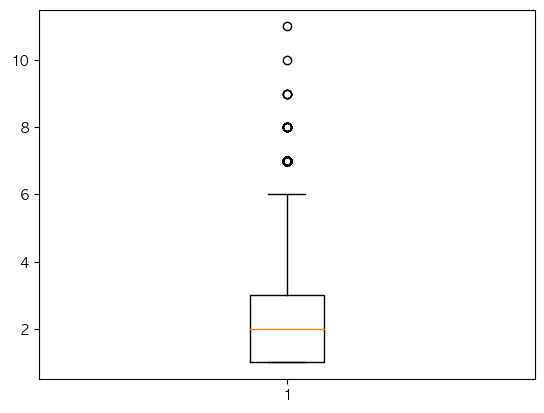

In [34]:
plt.boxplot(BuyCount['고객id'])

##### 2) 데이터 컬럼 분석 후 데이터 전처리

In [35]:
# 필요없는거 빼기
# 환불 drop
df.drop(df[df["유형"] == "REFUND"].index, inplace=True)

# ["거래금액", "환불금액", "시간대", "유형", "판매가격"] drop
df.drop(["거래금액", "환불금액", "시간대", "유형", "판매가격"] , axis=1 ,inplace=True)

In [36]:
# ["고객id", "거래일자"]로 정렬
df = df.sort_values(by=["고객id", "거래일자"], ascending=[True, True])

In [37]:
# 구매 횟수['count'] 컬럼 추가
df['count'] = df.groupby('고객id').cumcount() + 1
df

,고객id,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,결제수단,실거래금액,쿠폰할인액,월,count
50188,0,올인원,프로그래밍,초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring),2022-09-11 20:09:32,[WELCOME] 온라인 강의 3만원 할인,POINT,165000,30000,9,1
63208,1,올인원,영상/3D,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,2022-08-15 23:08:33,[프로모션] 7월 100% 페이백 이벤트,CARD,18000,197000,8,1
146612,6,올인원,업무 생산성,초격차 패키지 : 직장인이 진짜 필요한 업무자동화 SUPER팩,2022-01-18 20:01:59,[JAN22] 온라인 강의 2만원 즉시 추가 할인 쿠폰,CARD,139000,20000,1,1
134126,6,올인원,데이터 사이언스,올인원 패키지 : 실무 문제 해결을 위한 데이터 사이언스,2022-02-11 14:02:10,-,CARD,237000,-,2,2
74070,6,올인원,데이터 사이언스,올인원 패키지 : 실무 문제 해결을 위한 데이터 사이언스,2022-07-21 16:07:19,-,CARD,248000,-,7,3
...,...,...,...,...,...,...,...,...,...,...,...
146272,99998,올인원,투자/재테크,올인원 패키지 : 박민수에게 배우는 직장인 초현실 투자 전략,2022-01-19 23:01:40,-,POINT,310000,-,1,2
108767,99998,올인원,업무 생산성,초격차 패키지 : 일잘러 필수 스킬 모음.zip,2022-04-19 21:04:03,패캐머_온라인 쿠폰,PROMOTION,0,159000,4,3
71292,99998,올인원,프로그래밍,실무 프로젝트로 배우는 Kotlin & Spring : 리팩토링부터 서비스 구현까지,2022-07-27 04:07:04,-,CARD,160000,-,7,4
16811,99998,RED,데이터 사이언스,THE RED : Area Chair 이광무 교수의 Neural Fields & 3...,2022-11-30 17:11:51,-,CARD,378000,-,11,5


In [38]:
# '고객id' 별 'count'로 groupby
df["구매횟수"] = df.groupby(["고객id"])["고객id"].transform('count')
df

,고객id,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,결제수단,실거래금액,쿠폰할인액,월,count,구매횟수
50188,0,올인원,프로그래밍,초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring),2022-09-11 20:09:32,[WELCOME] 온라인 강의 3만원 할인,POINT,165000,30000,9,1,1
63208,1,올인원,영상/3D,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,2022-08-15 23:08:33,[프로모션] 7월 100% 페이백 이벤트,CARD,18000,197000,8,1,1
146612,6,올인원,업무 생산성,초격차 패키지 : 직장인이 진짜 필요한 업무자동화 SUPER팩,2022-01-18 20:01:59,[JAN22] 온라인 강의 2만원 즉시 추가 할인 쿠폰,CARD,139000,20000,1,1,5
134126,6,올인원,데이터 사이언스,올인원 패키지 : 실무 문제 해결을 위한 데이터 사이언스,2022-02-11 14:02:10,-,CARD,237000,-,2,2,5
74070,6,올인원,데이터 사이언스,올인원 패키지 : 실무 문제 해결을 위한 데이터 사이언스,2022-07-21 16:07:19,-,CARD,248000,-,7,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
146272,99998,올인원,투자/재테크,올인원 패키지 : 박민수에게 배우는 직장인 초현실 투자 전략,2022-01-19 23:01:40,-,POINT,310000,-,1,2,5
108767,99998,올인원,업무 생산성,초격차 패키지 : 일잘러 필수 스킬 모음.zip,2022-04-19 21:04:03,패캐머_온라인 쿠폰,PROMOTION,0,159000,4,3,5
71292,99998,올인원,프로그래밍,실무 프로젝트로 배우는 Kotlin & Spring : 리팩토링부터 서비스 구현까지,2022-07-27 04:07:04,-,CARD,160000,-,7,4,5
16811,99998,RED,데이터 사이언스,THE RED : Area Chair 이광무 교수의 Neural Fields & 3...,2022-11-30 17:11:51,-,CARD,378000,-,11,5,5


In [39]:
# ["구매횟수", "고객id", "거래일자"]값을 기준으로 정렬 다시하기
df = df.loc[:,["고객id","카테고리", "코스(상품) 이름", "거래일자", "실거래금액", "쿠폰이름", "count", "구매횟수"]].sort_values(by=["구매횟수", "고객id", "거래일자"], ascending=[False, True, True])

In [40]:
df

,고객id,카테고리,코스(상품) 이름,거래일자,실거래금액,쿠폰이름,count,구매횟수
142663,89601,데이터 사이언스,The RED : 우버처럼 하는 머신러닝 의사결정 by 정종빈,2022-01-30 02:01:43,199000,[WELCOME] 처음이라면 누구나 The Red 5만원 할인,1,11
117091,89601,데이터 사이언스,초격차 패키지 : 데이터 엔지니어링,2022-03-29 22:03:46,289000,-,2,11
103895,89601,투자/재테크,초격차 패키지 : 한 번에 끝내는 부동산 경매/공매,2022-05-04 07:05:58,95000,[프로모션] 4월 100% 페이백 이벤트,3,11
92178,89601,일러스트,초격차 패키지 : 세상의 모든 감성 아이패드 드로잉,2022-06-10 11:06:44,158000,[디자인] 3만원할인,4,11
89518,89601,프로그래밍,초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,2022-06-17 16:06:22,198000,-,5,11
...,...,...,...,...,...,...,...,...
125191,99982,영상/3D,올인원 패키지 : 애프터이펙트를 활용한 2D 모션그래픽 (2021),2022-03-04 22:03:34,0,[프로모션] 2월 1+1 수강권 이벤트,1,1
127849,99983,데이터 사이언스,The RED : Meta 연구원 문경식의 단일 이미지 인식을 통한 Human Po...,2022-02-28 15:02:40,349000,-,1,1
22248,99988,일러스트,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,2022-11-17 11:11:41,249000,[WELCOME] 온라인 강의 3만원 할인,1,1
78914,99990,영상/3D,이필성의 포토클래스 시선을 사로잡는 특별한 사진을 만드는 법 Online.,2022-07-10 21:07:18,172000,-,1,1


##### 3) 타겟 설정

 - 데이터 전처리 후 타겟(목표) 재설정

         a. 구매 빈도를 통한 고객 구분 

{'whiskers': [<matplotlib.lines.Line2D at 0x2a272bac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a273d040>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a272b820>],
 'medians': [<matplotlib.lines.Line2D at 0x2a273d580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a273d820>],
 'means': []}

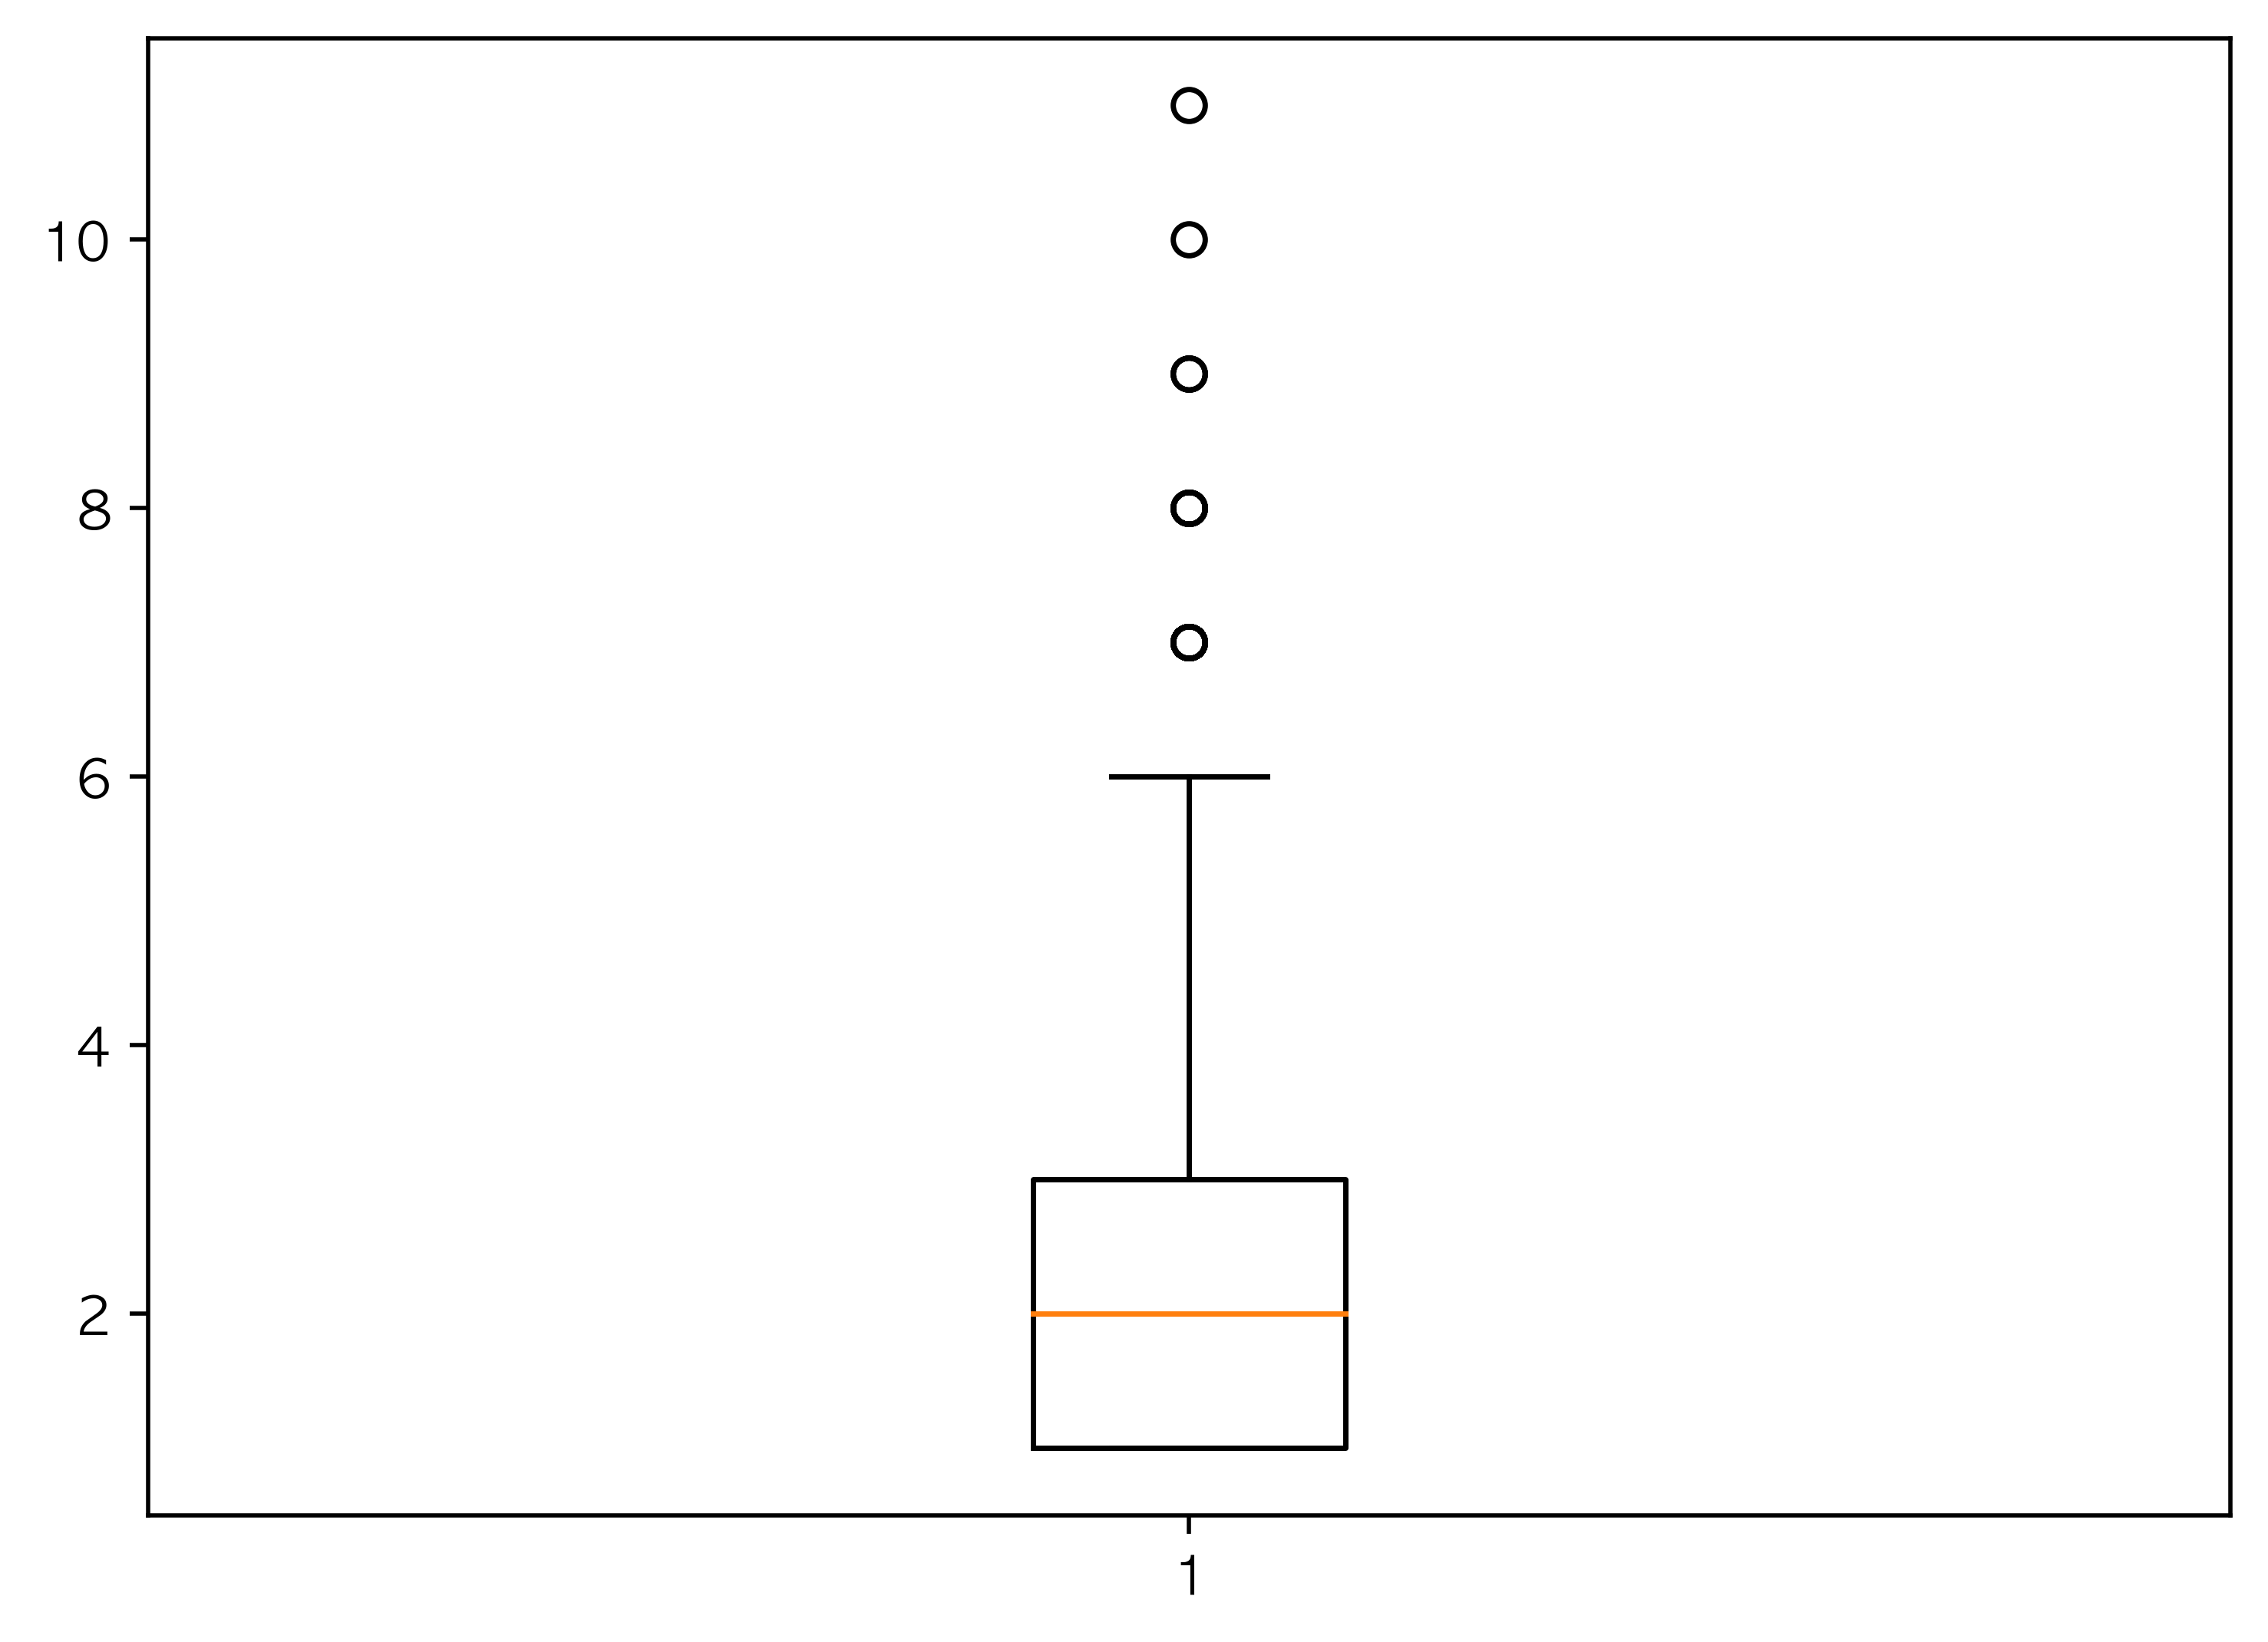

In [73]:
# 구매 빈도를 통한 고객군 분석
plt.boxplot(BuyCount['고객id'])

In [41]:
# 분석을 위해 구매 횟수별 데이터프레임 생성

df_up3 = df[df["구매횟수"] >= 3].reset_index(drop=True)
df_down2 = df[df["구매횟수"] <= 2].reset_index(drop=True)
df_2 = df[df["구매횟수"] == 2].reset_index(drop=True)

In [42]:
# 3회 이상 구매자 데이터프레임 = df_up3

df_up3

,고객id,카테고리,코스(상품) 이름,거래일자,실거래금액,쿠폰이름,count,구매횟수
0,89601,데이터 사이언스,The RED : 우버처럼 하는 머신러닝 의사결정 by 정종빈,2022-01-30 02:01:43,199000,[WELCOME] 처음이라면 누구나 The Red 5만원 할인,1,11
1,89601,데이터 사이언스,초격차 패키지 : 데이터 엔지니어링,2022-03-29 22:03:46,289000,-,2,11
2,89601,투자/재테크,초격차 패키지 : 한 번에 끝내는 부동산 경매/공매,2022-05-04 07:05:58,95000,[프로모션] 4월 100% 페이백 이벤트,3,11
3,89601,일러스트,초격차 패키지 : 세상의 모든 감성 아이패드 드로잉,2022-06-10 11:06:44,158000,[디자인] 3만원할인,4,11
4,89601,프로그래밍,초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,2022-06-17 16:06:22,198000,-,5,11
...,...,...,...,...,...,...,...,...
64707,99964,영상/3D,3D 캐릭터를 가장 쉽게 만드는 법: 아이패드 모델링,2022-11-28 01:11:08,208000,-,2,3
64708,99964,프로그래밍,(221212~230131) 올인원 패키지 : 한 번에 끝내는 Java/Spring...,2022-12-23 14:12:12,79200,[20% 할인] 한 번에 끝내는 Java/Spring 웹 개발 Essential 2...,3,3
64709,99979,투자/재테크,초격차 패키지 : 한 번에 끝내는 주식 투자의 모든 것,2022-01-14 15:01:27,314000,[WELCOME] 처음이라면 누구나 투자/재테크 5만원 할인,1,3
64710,99979,업무 생산성,초격차 패키지: 한 번에 끝내는 비즈니스 영어,2022-03-28 19:03:38,139000,[2만원 할인] 비즈니스 영어 초격차 런칭 기념 2만원 할인 쿠폰,2,3


In [43]:
# 2회 이하 구매자 데이터프레임 
df_down2

,고객id,카테고리,코스(상품) 이름,거래일자,실거래금액,쿠폰이름,count,구매횟수
0,11,일러스트,올인원 패키지 : 배곡파 작가의 웹소설 남자 캐릭터 일러스트,2022-01-04 12:01:02,184000,-,1,2
1,11,영상/3D,용호수의 돈 버는 실전 영상 제작,2022-05-05 18:05:17,299000,-,2,2
2,15,마케팅,올인원 패키지 : 7일만에 끝내는 디지털 마케팅 광고집행 실무,2022-01-27 09:01:25,149000,-,1,2
3,15,일러스트,올인원 패키지 : star741의 31가지 캐주얼 일러스트 채색&묘사,2022-10-07 18:10:28,109500,[증정] 온라인강의 10월 판매가 50%할인권,2,2
4,18,프로그래밍,The RED : 현실 세상의 TDD by 이규원,2022-02-22 16:02:48,211000,-,1,2
...,...,...,...,...,...,...,...,...
83293,99982,영상/3D,올인원 패키지 : 애프터이펙트를 활용한 2D 모션그래픽 (2021),2022-03-04 22:03:34,0,[프로모션] 2월 1+1 수강권 이벤트,1,1
83294,99983,데이터 사이언스,The RED : Meta 연구원 문경식의 단일 이미지 인식을 통한 Human Po...,2022-02-28 15:02:40,349000,-,1,1
83295,99988,일러스트,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,2022-11-17 11:11:41,249000,[WELCOME] 온라인 강의 3만원 할인,1,1
83296,99990,영상/3D,이필성의 포토클래스 시선을 사로잡는 특별한 사진을 만드는 법 Online.,2022-07-10 21:07:18,172000,-,1,1


In [44]:
# 2회 구매자 데이터프레임
df_2

,고객id,카테고리,코스(상품) 이름,거래일자,실거래금액,쿠폰이름,count,구매횟수
0,11,일러스트,올인원 패키지 : 배곡파 작가의 웹소설 남자 캐릭터 일러스트,2022-01-04 12:01:02,184000,-,1,2
1,11,영상/3D,용호수의 돈 버는 실전 영상 제작,2022-05-05 18:05:17,299000,-,2,2
2,15,마케팅,올인원 패키지 : 7일만에 끝내는 디지털 마케팅 광고집행 실무,2022-01-27 09:01:25,149000,-,1,2
3,15,일러스트,올인원 패키지 : star741의 31가지 캐주얼 일러스트 채색&묘사,2022-10-07 18:10:28,109500,[증정] 온라인강의 10월 판매가 50%할인권,2,2
4,18,프로그래밍,The RED : 현실 세상의 TDD by 이규원,2022-02-22 16:02:48,211000,-,1,2
...,...,...,...,...,...,...,...,...
49569,99992,프로그래밍,초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring),2022-10-10 10:10:14,53800,[프로모션] 9월 100% 페이백 이벤트,2,2
49570,99994,영상/3D,Realistic Character 제작으로 배우는 게임 캐릭터 모델링,2022-07-04 00:07:38,7000,[프로모션] 6월 페이백 이벤트,1,2
49571,99994,프로그래밍,초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편,2022-12-09 21:12:29,0,[프로모션] 11월 1+1 쿠폰 이벤트,2,2
49572,99996,마케팅,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",2022-04-09 12:04:44,184000,-,1,2


     b. 파워 유저의 특징 파악

In [45]:
# 지수표현식 없애기
pd.options.display.float_format = '{:.5f}'.format

 - 구매자 비율 비교(3회 이상 vs 1,2회))

In [ ]:
up3_count = len(df_up3['고객id'].unique())
down2_count = len(df_down2['고객id'].unique())
total_count = up3_count + down2_count
print(f'3회 이상 구매자 수 : {up3_count}')
print(f'1,2회 구매자 수 : {down2_count}')

3회 이상 구매자 수 : 18699
1,2회 구매자 수 : 58511


Text(0.5, 1.0, '구매자 비율')

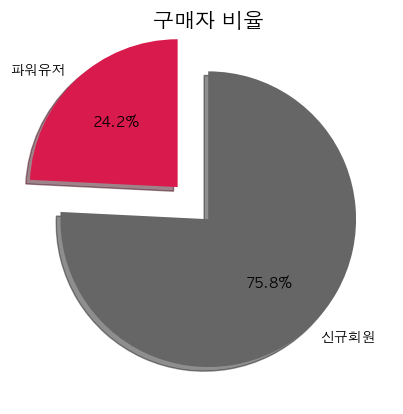

In [ ]:
labels = ['파워유저', '신규회원']
sizes = [up3_count, down2_count]
explode = (0.3, 0)

# colors = sns.color_palette('hls',len(labels))
colors = ['#D91A4D', '#666666'] # '#0D0D0D 너무 꺼매서 좀 회색으로 바꿈

# texts, autotexts 인자를 활용하여 텍스트 스타일링을 적용합니다
patches, texts, autotexts = plt.pie(sizes, 
                                    explode=explode, 
                                    labels=labels,  
                                    autopct='%1.1f%%',
                                    shadow=True, 
                                    startangle=90,
                                    colors = colors)

plt.title('구매자 비율', fontsize=15)

In [ ]:
df_count_ratio = pd.DataFrame([up3_count/total_count*100 , down2_count/total_count*100],
                              index=['3회 이상 구매자 수(%)', '1,2회 이상 구매자 수(%)'])
df_count_ratio.rename({0 : '퍼센트'}, axis = 1, inplace=True)
df_count_ratio

,퍼센트
3회 이상 구매자 수(%),24.21837
"1,2회 이상 구매자 수(%)",75.78163


- 구매 누적액 비교 (3회 이상 vs 1,2회)

In [46]:
up3_sum = df_up3['실거래금액'].sum()
down2_sum = df_down2['실거래금액'].sum()
total_sum = up3_sum + down2_sum
print(f'3회 이상 구매누적액 : {up3_sum}')
print(f'1,2회 구매누적액 : {down2_sum}')

3회 이상 구매누적액 : 10883436026
1,2회 구매누적액 : 13970202252


Text(0.5, 1.0, '구매 누적액 비율')

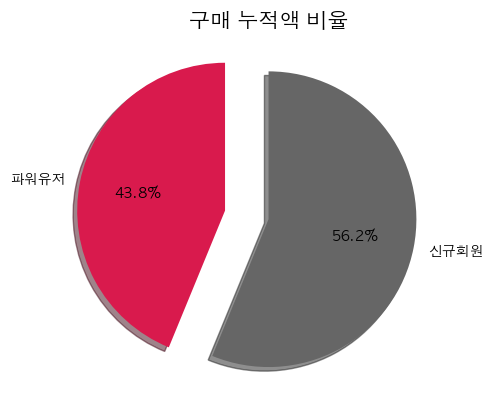

In [47]:
labels = ['파워유저', '신규회원']
sizes = [up3_sum, down2_sum]
explode = (0.3, 0)

# colors = sns.color_palette('hls',len(labels))
colors = ['#D91A4D', '#666666'] # '#0D0D0D 너무 꺼매서 좀 회색으로 바꿈

# texts, autotexts 인자를 활용하여 텍스트 스타일링을 적용합니다
patches, texts, autotexts = plt.pie(sizes, 
                                    explode=explode, 
                                    labels=labels,  
                                    autopct='%1.1f%%',
                                    shadow=True, 
                                    startangle=90,
                                    colors = colors)

plt.title('구매 누적액 비율', fontsize=15)

In [ ]:

df_money_ratio = pd.DataFrame([up3_sum/total_sum*100, down2_sum/total_sum*100],
                              index=['3회 이상 구매자 매출', '1,2회 이상 구매자 매출'])
df_money_ratio.rename({0 : '퍼센트'}, axis = 1, inplace=True)
df_money_ratio

- 구매액 비교 (3회이상 vs 1,2회)

In [51]:
# 충성 고객과 신규 고객의 1인당 구매액
up3_one_man = up3_sum/up3_count
down2_one_man = down2_sum/down2_count

df_one_man_ratio = pd.DataFrame([up3_one_man, down2_one_man],
                              index=['3회 이상 구매자 1인당 구매액', '1,2회 이상 구매자 1인당 구매액'])
df_one_man_ratio.rename({0 : '1인당 구매액'}, axis = 1, inplace=True)
df_one_man_ratio

,1인당 구매액
3회 이상 구매자 1인당 구매액,582033.05129
"1,2회 이상 구매자 1인당 구매액",238761.98069


<Axes: ylabel='1인당 구매액'>

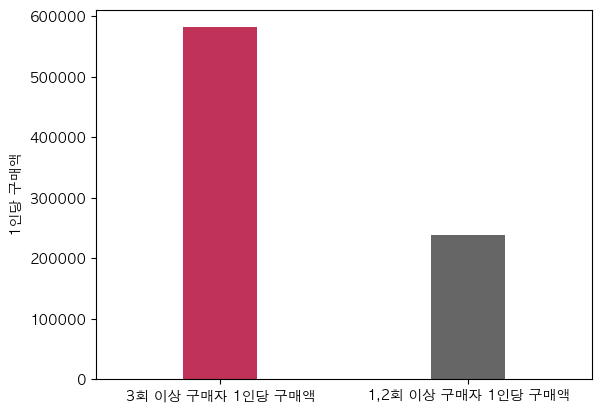

In [52]:
colors = ['#D91A4D', '#666666'] # '#0D0D0D 너무 꺼매서 좀 회색으로 바꿈

sns.barplot(x = df_one_man_ratio.index, y = df_one_man_ratio['1인당 구매액'],
            width = 0.3,
            palette = colors)

In [53]:
print(f'파워유저가 신규 유저에 비해 구매액이 약{round(up3_one_man/down2_one_man, 2)}배 차이남')

파워유저가 신규 유저에 비해 구매액이 약2.44배 차이남


- 구매 간격 비교 (2회 구매자/3회 이상 구매자의 1~2회 구매간격 비교)

In [54]:
df_2_pivot = df_2.pivot(index=["구매횟수", "고객id"], columns="count", values="거래일자")
df_2_pivot

count                        1                   2
구매횟수 고객id                                         
2    11    2022-01-04 12:01:02 2022-05-05 18:05:17
     15    2022-01-27 09:01:25 2022-10-07 18:10:28
     18    2022-02-22 16:02:48 2022-04-26 11:04:13
     20    2022-02-17 10:02:47 2022-08-29 12:08:58
     23    2022-02-13 18:02:00 2022-06-20 19:06:21
...                        ...                 ...
     99978 2022-09-08 14:09:46 2022-11-09 08:11:12
     99991 2022-02-13 00:02:56 2022-03-02 14:03:56
     99992 2022-08-10 14:08:02 2022-10-10 10:10:14
     99994 2022-07-04 00:07:38 2022-12-09 21:12:29
     99996 2022-04-09 12:04:44 2022-11-01 12:11:28

[24787 rows x 2 columns]

In [55]:
df_2_pivot['구매간격'] = df_2_pivot[2] - df_2_pivot[1]
df_2_pivot

count                        1                   2              구매간격
구매횟수 고객id                                                           
2    11    2022-01-04 12:01:02 2022-05-05 18:05:17 121 days 06:04:15
     15    2022-01-27 09:01:25 2022-10-07 18:10:28 253 days 09:09:03
     18    2022-02-22 16:02:48 2022-04-26 11:04:13  62 days 19:01:25
     20    2022-02-17 10:02:47 2022-08-29 12:08:58 193 days 02:06:11
     23    2022-02-13 18:02:00 2022-06-20 19:06:21 127 days 01:04:21
...                        ...                 ...               ...
     99978 2022-09-08 14:09:46 2022-11-09 08:11:12  61 days 18:01:26
     99991 2022-02-13 00:02:56 2022-03-02 14:03:56  17 days 14:01:00
     99992 2022-08-10 14:08:02 2022-10-10 10:10:14  60 days 20:02:12
     99994 2022-07-04 00:07:38 2022-12-09 21:12:29 158 days 21:04:51
     99996 2022-04-09 12:04:44 2022-11-01 12:11:28 206 days 00:06:44

[24787 rows x 3 columns]

In [56]:
df_up3_pivot = df_up3.pivot(index=["구매횟수", "고객id"], columns="count", values="거래일자")
df_up3_pivot = df_up3_pivot.loc[:, [1,2]]
df_up3_pivot

count                        1                   2
구매횟수 고객id                                         
3    8     2022-02-23 18:02:45 2022-09-06 19:09:51
     12    2022-05-10 22:05:26 2022-05-26 14:05:20
     13    2022-06-26 23:06:51 2022-09-29 12:09:23
     16    2022-05-04 11:05:54 2022-08-09 16:08:43
     22    2022-02-07 02:02:00 2022-05-04 01:05:21
...                        ...                 ...
8    89421 2022-01-05 23:01:20 2022-01-10 19:01:04
     98806 2022-01-03 00:01:15 2022-01-14 14:01:30
9    81811 2022-03-03 18:03:49 2022-06-17 23:06:23
10   3930  2022-02-02 16:02:50 2022-02-06 21:02:52
11   89601 2022-01-30 02:01:43 2022-03-29 22:03:46

[18699 rows x 2 columns]

In [57]:
df_up3_pivot['구매간격'] = df_up3_pivot[2] - df_up3_pivot[1]
df_up3_pivot

count                        1                   2              구매간격
구매횟수 고객id                                                           
3    8     2022-02-23 18:02:45 2022-09-06 19:09:51 195 days 01:07:06
     12    2022-05-10 22:05:26 2022-05-26 14:05:20  15 days 15:59:54
     13    2022-06-26 23:06:51 2022-09-29 12:09:23  94 days 13:02:32
     16    2022-05-04 11:05:54 2022-08-09 16:08:43  97 days 05:02:49
     22    2022-02-07 02:02:00 2022-05-04 01:05:21  85 days 23:03:21
...                        ...                 ...               ...
8    89421 2022-01-05 23:01:20 2022-01-10 19:01:04   4 days 19:59:44
     98806 2022-01-03 00:01:15 2022-01-14 14:01:30  11 days 14:00:15
9    81811 2022-03-03 18:03:49 2022-06-17 23:06:23 106 days 05:02:34
10   3930  2022-02-02 16:02:50 2022-02-06 21:02:52   4 days 05:00:02
11   89601 2022-01-30 02:01:43 2022-03-29 22:03:46  58 days 20:02:03

[18699 rows x 3 columns]

### 3. 분석

##### 1) 3회 구매로 넘어가는 고객들의 패턴 파악

In [62]:
ctg_list = df['카테고리'].unique().tolist()
print(len(ctg_list))
print(ctg_list)

11
['데이터 사이언스', '투자/재테크', '일러스트', '프로그래밍', '업무 생산성', '영상/3D', '디자인', '부업/창업', '마케팅', '부동산/금융', '크리에이티브']


In [63]:
df_ctg = df.pivot(index=["구매횟수", "고객id"], columns="count", values="카테고리")
df_ctg

count             1         2       3         4         5         6   \
구매횟수 고객id                                                              
1    0         프로그래밍       NaN     NaN       NaN       NaN       NaN   
     1         영상/3D       NaN     NaN       NaN       NaN       NaN   
     9        업무 생산성       NaN     NaN       NaN       NaN       NaN   
     14        프로그래밍       NaN     NaN       NaN       NaN       NaN   
     19        프로그래밍       NaN     NaN       NaN       NaN       NaN   
...              ...       ...     ...       ...       ...       ...   
8    89421    투자/재테크       마케팅  업무 생산성     영상/3D  데이터 사이언스     프로그래밍   
     98806    부동산/금융    업무 생산성     디자인     프로그래밍     프로그래밍      일러스트   
9    81811       마케팅    업무 생산성   영상/3D      일러스트     프로그래밍     프로그래밍   
10   3930        디자인     프로그래밍  업무 생산성  데이터 사이언스     프로그래밍       디자인   
11   89601  데이터 사이언스  데이터 사이언스  투자/재테크      일러스트     프로그래밍  데이터 사이언스   

count             7         8      9         10     11  
구매횟수 고객id                                               
1    0           NaN       NaN    NaN       NaN    NaN  
     1           NaN       NaN    NaN       NaN    NaN  
     9           NaN       NaN    NaN       NaN    NaN  
     14          NaN       NaN    NaN       NaN    NaN  
     19          NaN       NaN    NaN       NaN    NaN  
...              ...       ...    ...       ...    ...  
8    89421     프로그래밍       마케팅    NaN       NaN    NaN  
     98806  데이터 사이언스     프로그래밍    NaN       NaN    NaN  
9    81811      일러스트     영상/3D    디자인       NaN    NaN  
10   3930      프로그래밍     부업/창업  프로그래밍  데이터 사이언스    NaN  
11   89601    업무 생산성  데이터 사이언스  영상/3D      일러스트  프로그래밍  

[77210 rows x 11 columns]

In [64]:
# 색 지정 사이트
## https://color.adobe.com/ko/create/color-wheel

# from matplotlib.colors import LinearSegmentedColormap
# colors = ['#666666', '#DA49F2', '#DB4DD2', '#F249AE','#D91A4D']
# cmap = LinearSegmentedColormap.from_list('my_cmap',colors,gamma=2)
# cmap

In [65]:
# 히트맵 그리기 (2 - >3)
df_ctg_pivot_2 = df_ctg.pivot_table(index = 2, columns = 3, aggfunc='size').fillna('0').astype('int')
df_ctg_pivot_2

3,데이터 사이언스,디자인,마케팅,부동산/금융,부업/창업,업무 생산성,영상/3D,일러스트,크리에이티브,투자/재테크,프로그래밍
2,,,,,,,,,,,
데이터 사이언스,534,156,266,197,12,262,202,358,0,39,989
디자인,197,65,104,94,9,97,84,149,0,12,407
마케팅,282,77,120,114,9,122,103,191,0,18,511
부동산/금융,233,80,102,100,4,105,101,166,0,18,473
부업/창업,29,5,7,9,0,12,15,15,0,3,35
업무 생산성,264,85,145,115,13,121,117,164,1,24,537
영상/3D,294,104,142,128,8,127,130,192,0,22,627
일러스트,362,96,135,112,12,151,118,235,0,14,563
투자/재테크,46,20,15,18,1,37,23,21,0,4,99


<Axes: xlabel='3', ylabel='2'>

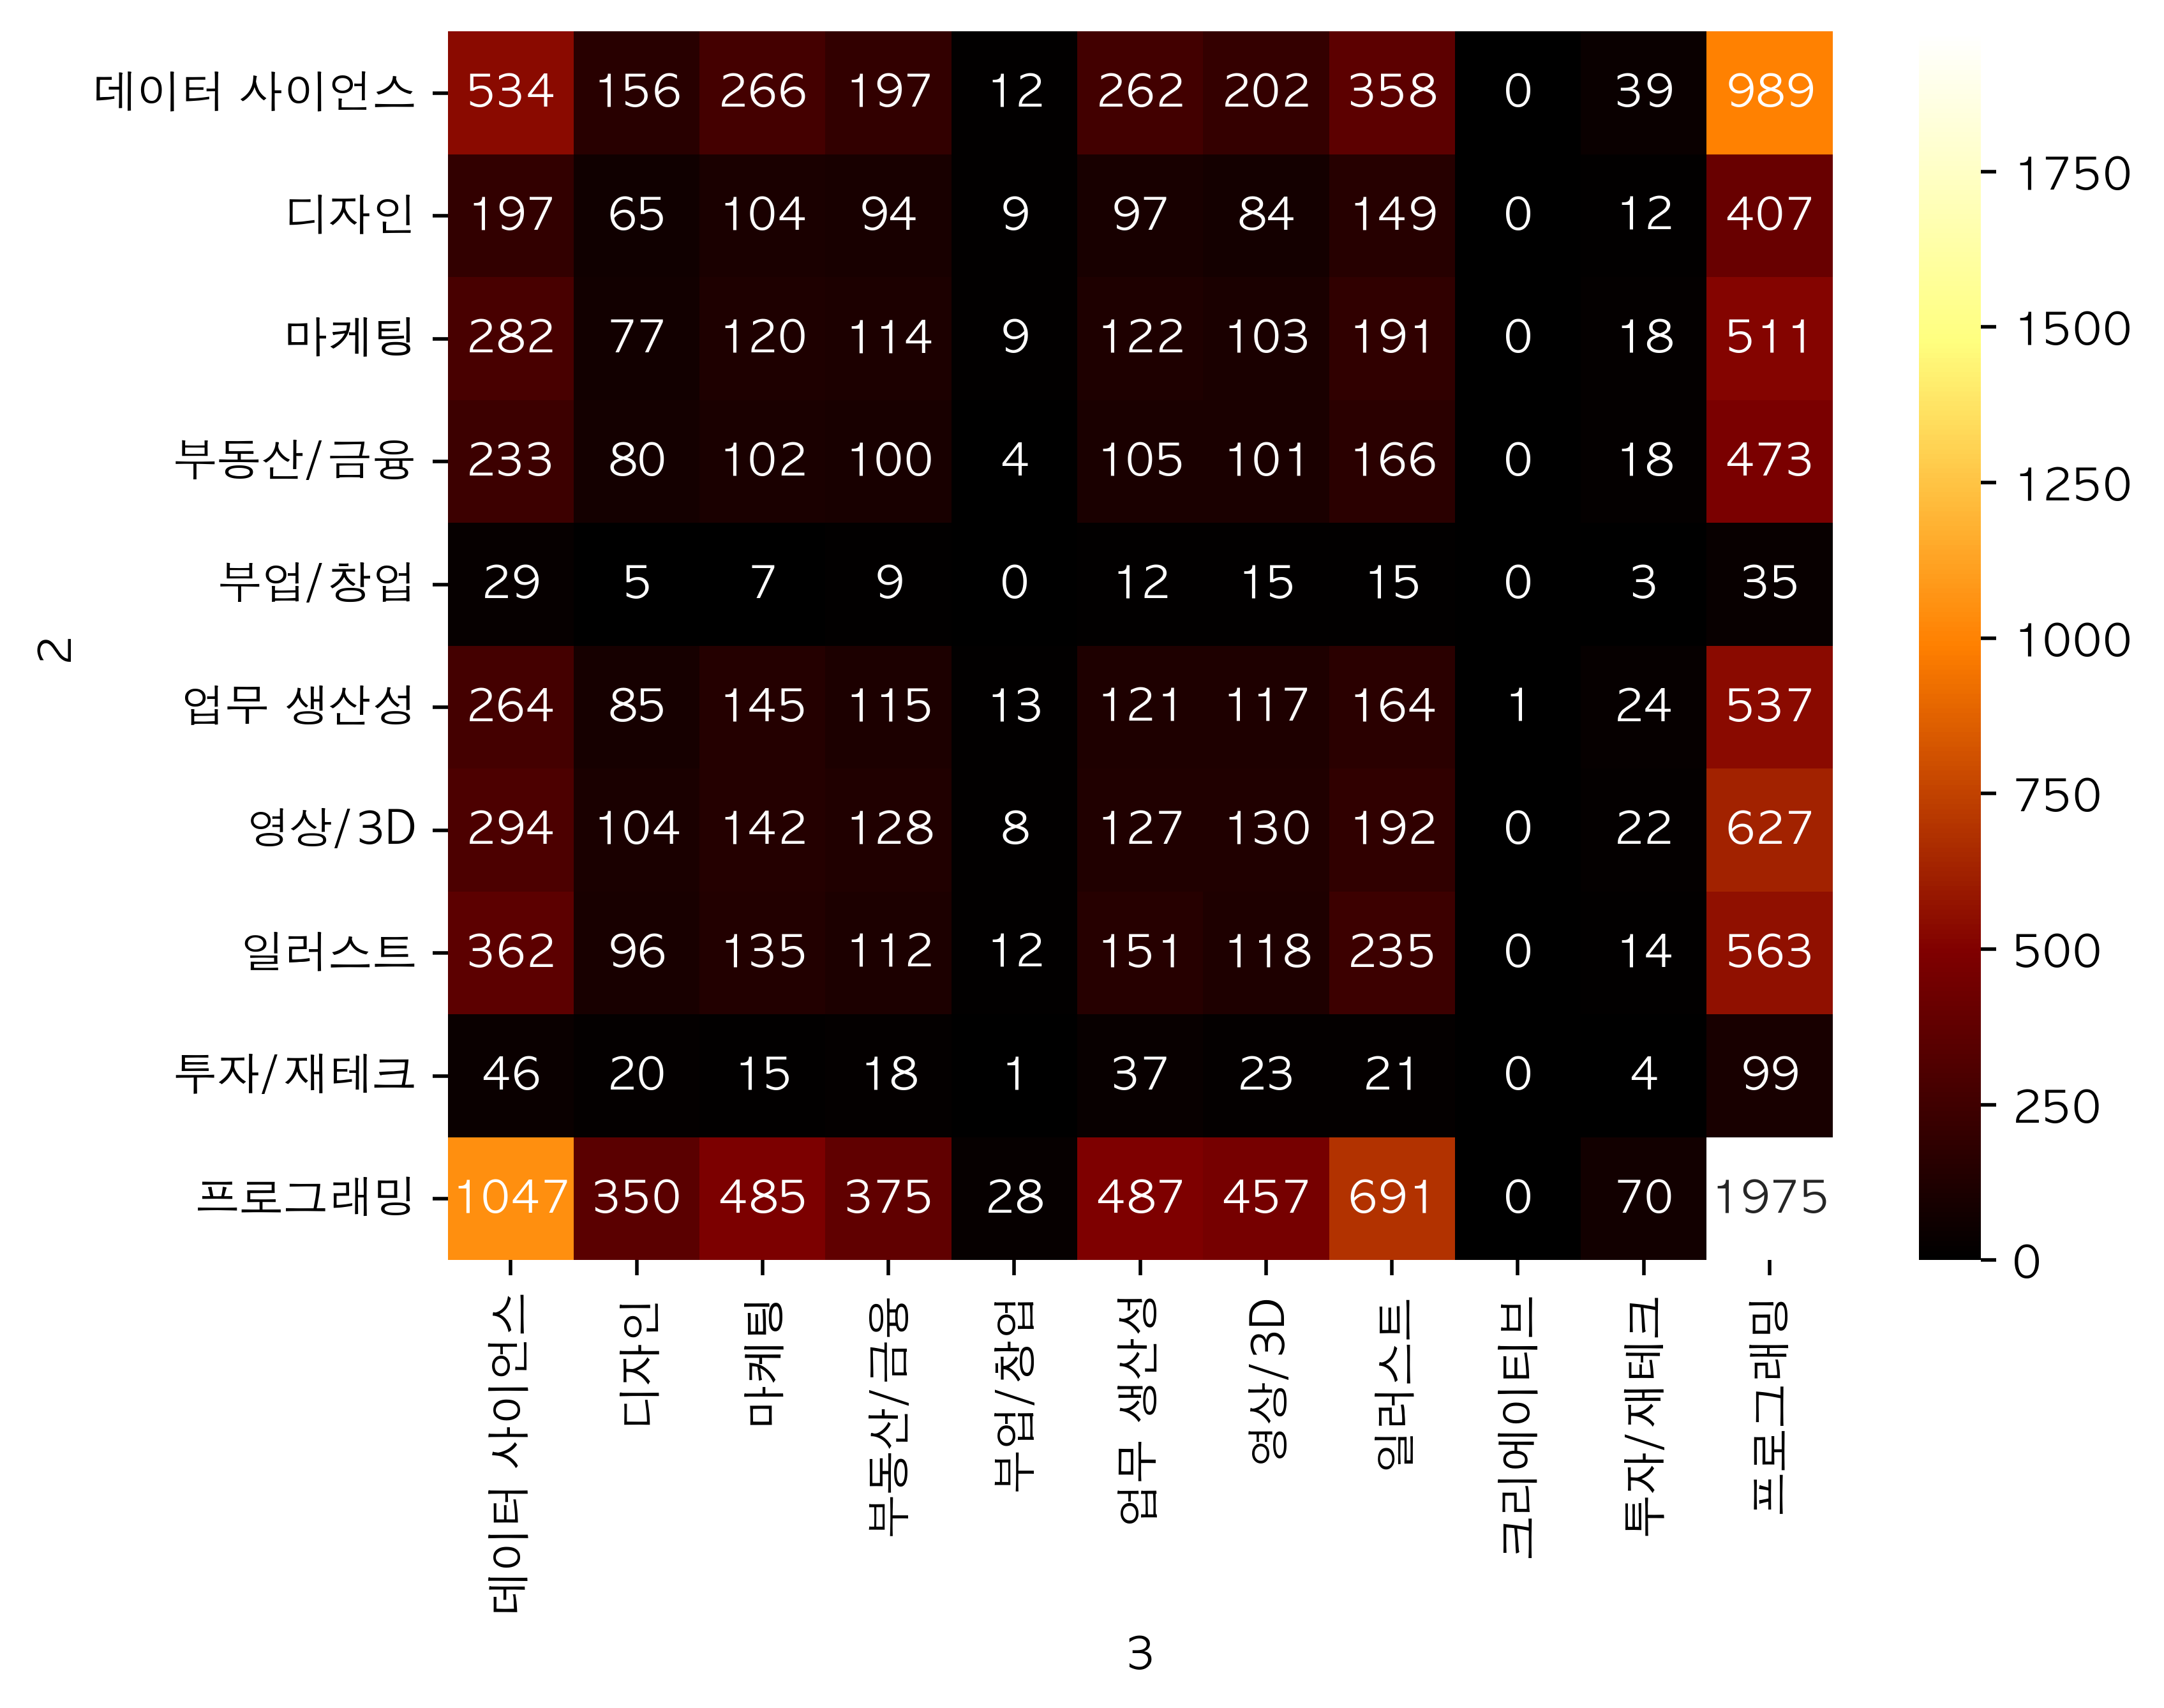

In [66]:
sns.heatmap(df_ctg_pivot_2, annot=True, cmap = 'afmhot', fmt = 'g')

In [67]:
# 히트맵 그리기 (1 - >2)
df_ctg_pivot_1 = df_ctg.pivot_table(index = 1, columns = 2, aggfunc='size').fillna('0').astype('int')
df_ctg_pivot_1

2,데이터 사이언스,디자인,마케팅,부동산/금융,부업/창업,업무 생산성,영상/3D,일러스트,투자/재테크,프로그래밍
1,,,,,,,,,,
데이터 사이언스,1244,440,563,520,50,581,586,702,83,2269
디자인,479,200,241,216,27,265,269,335,52,1010
마케팅,585,207,304,230,15,304,288,329,54,1125
부동산/금융,493,188,239,193,14,241,231,327,38,1030
부업/창업,66,20,33,28,4,27,36,41,5,147
업무 생산성,706,249,346,287,22,374,351,416,49,1371
영상/3D,731,261,382,310,20,387,386,454,56,1472
일러스트,553,186,297,244,14,268,284,353,38,1128
투자/재테크,154,70,85,56,3,74,73,96,14,320


<Axes: xlabel='2', ylabel='1'>

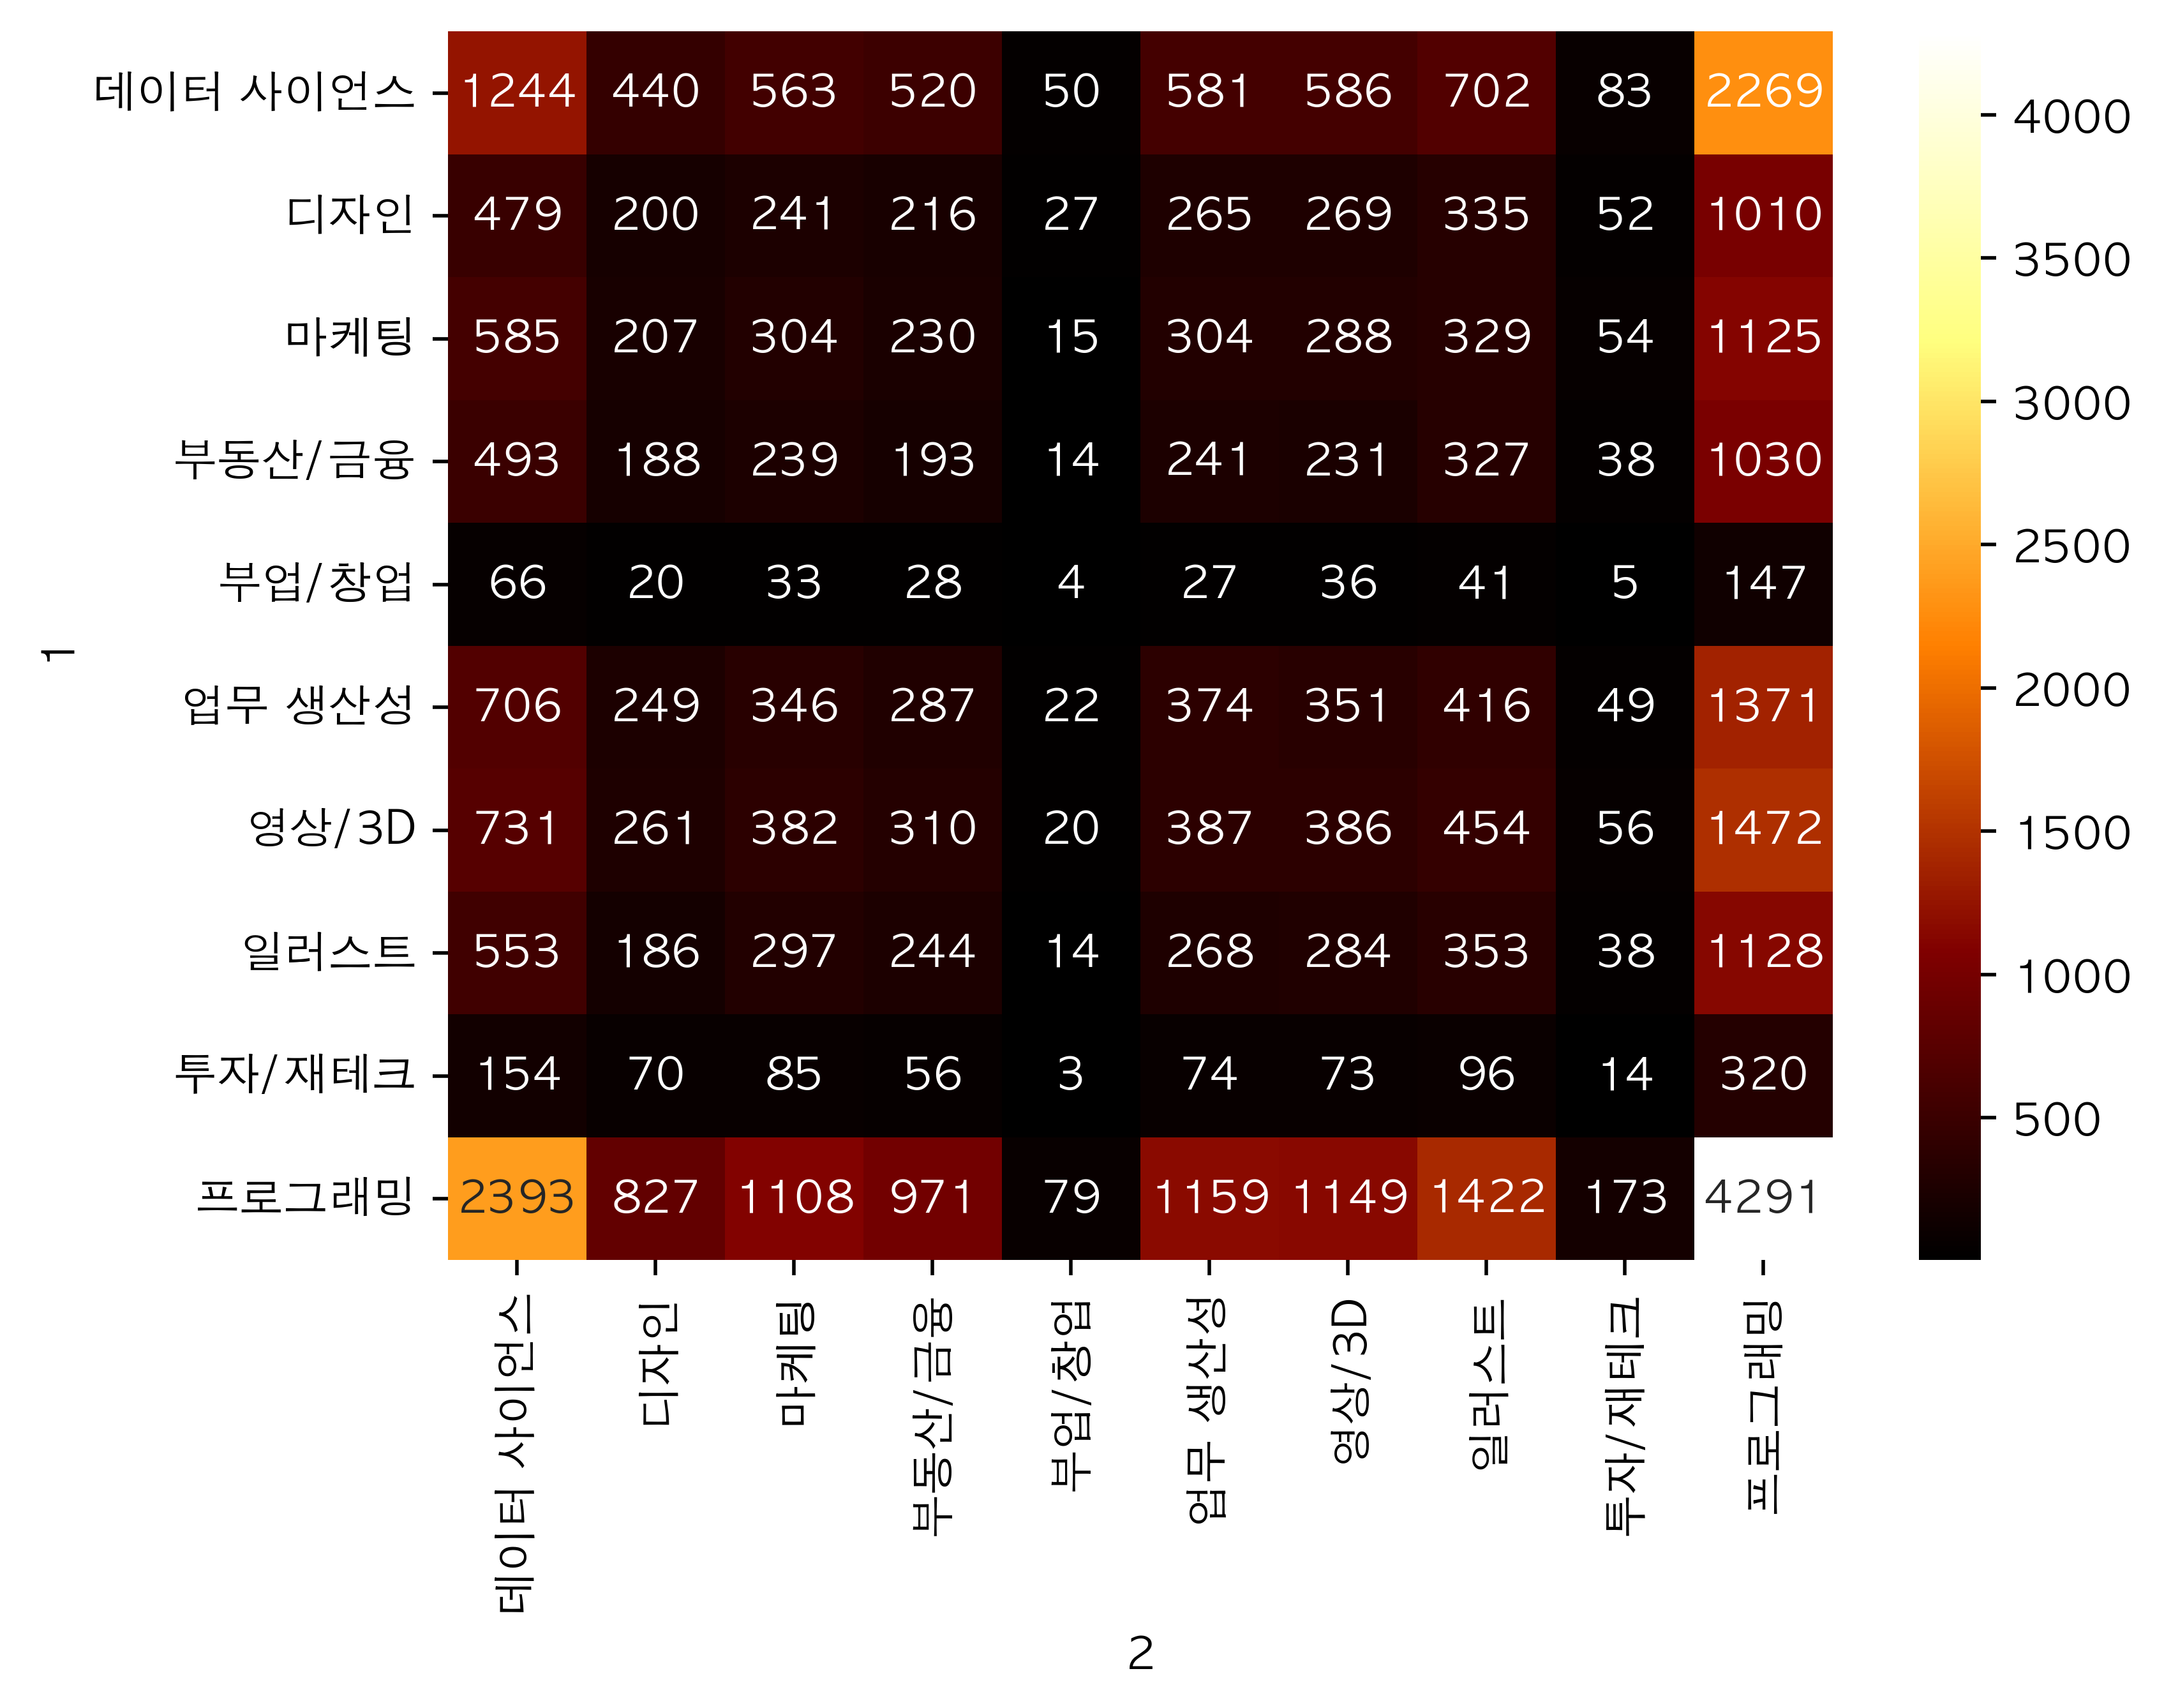

In [68]:
sns.heatmap(df_ctg_pivot_1, annot=True, cmap = 'afmhot', fmt = 'g')

<Axes: xlabel='4', ylabel='3'>

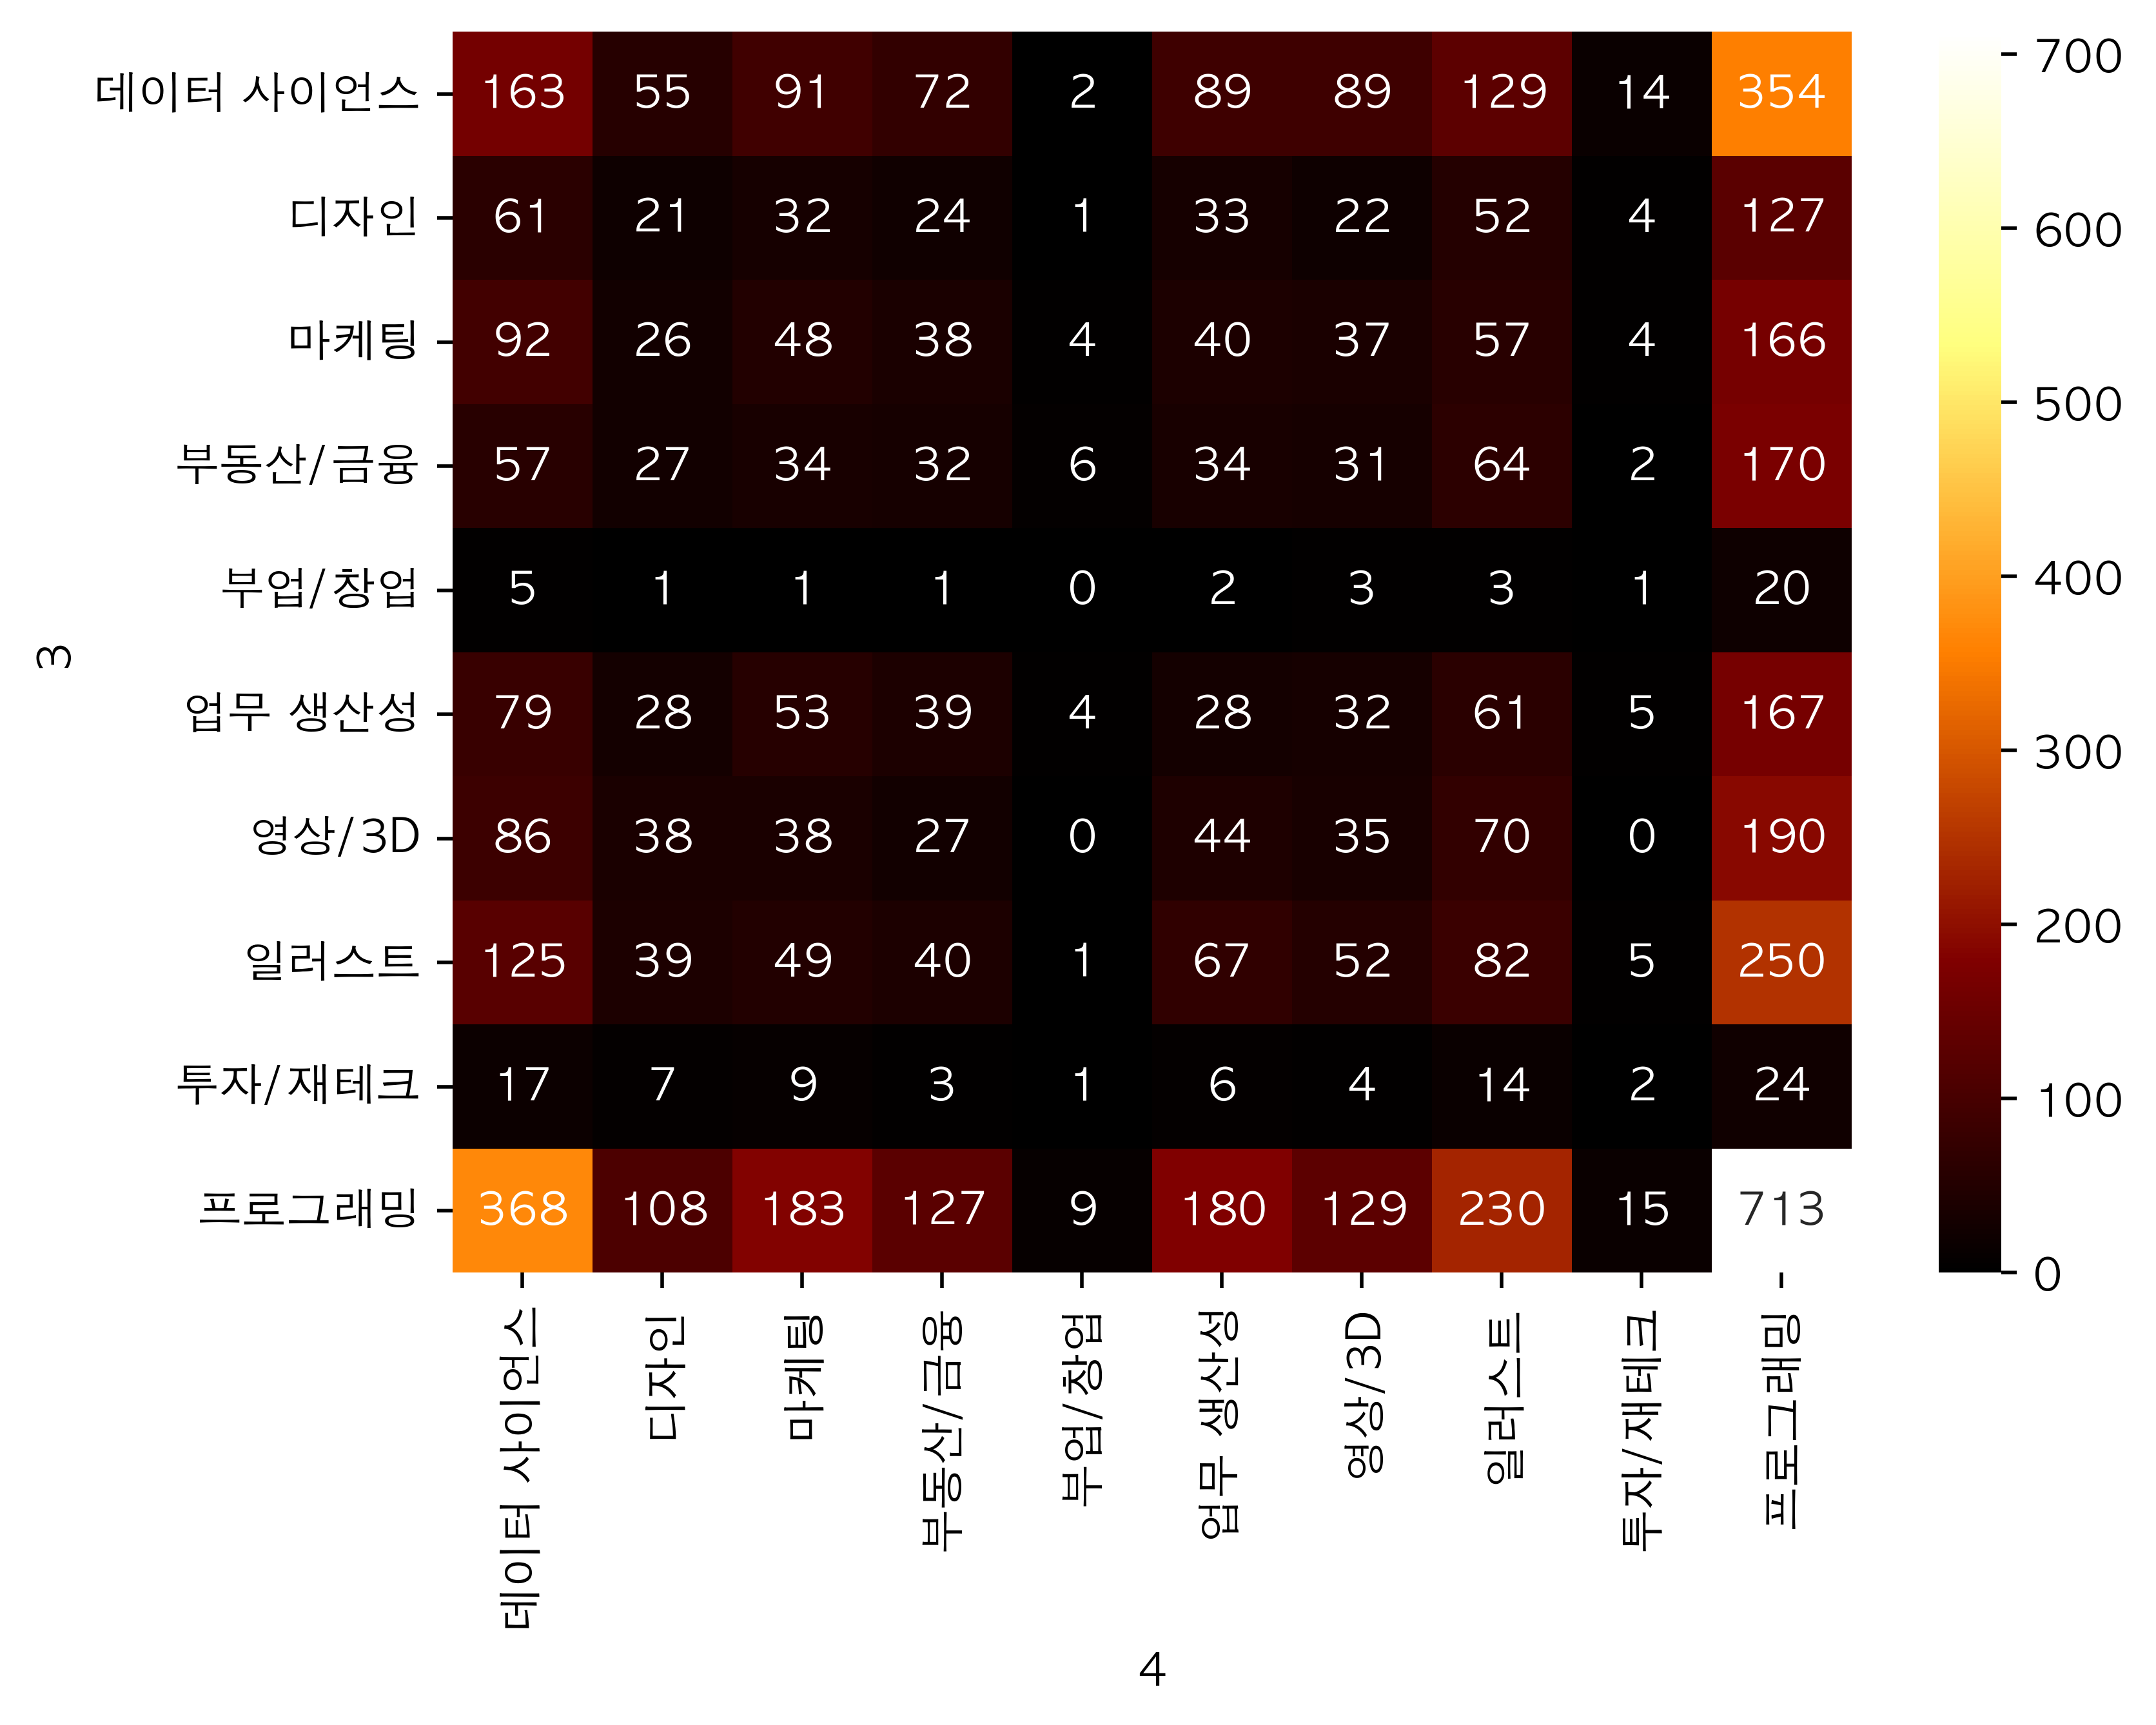

In [69]:
# 히트맵 그리기 (3 - >4)
df_ctg_pivot_3 = df_ctg.pivot_table(index = 3, columns = 4, aggfunc='size').fillna('0').astype('int')
df_ctg_pivot_3

sns.heatmap(df_ctg_pivot_3, annot=True, cmap = 'afmhot', fmt = 'g')

<Axes: xlabel='5', ylabel='4'>

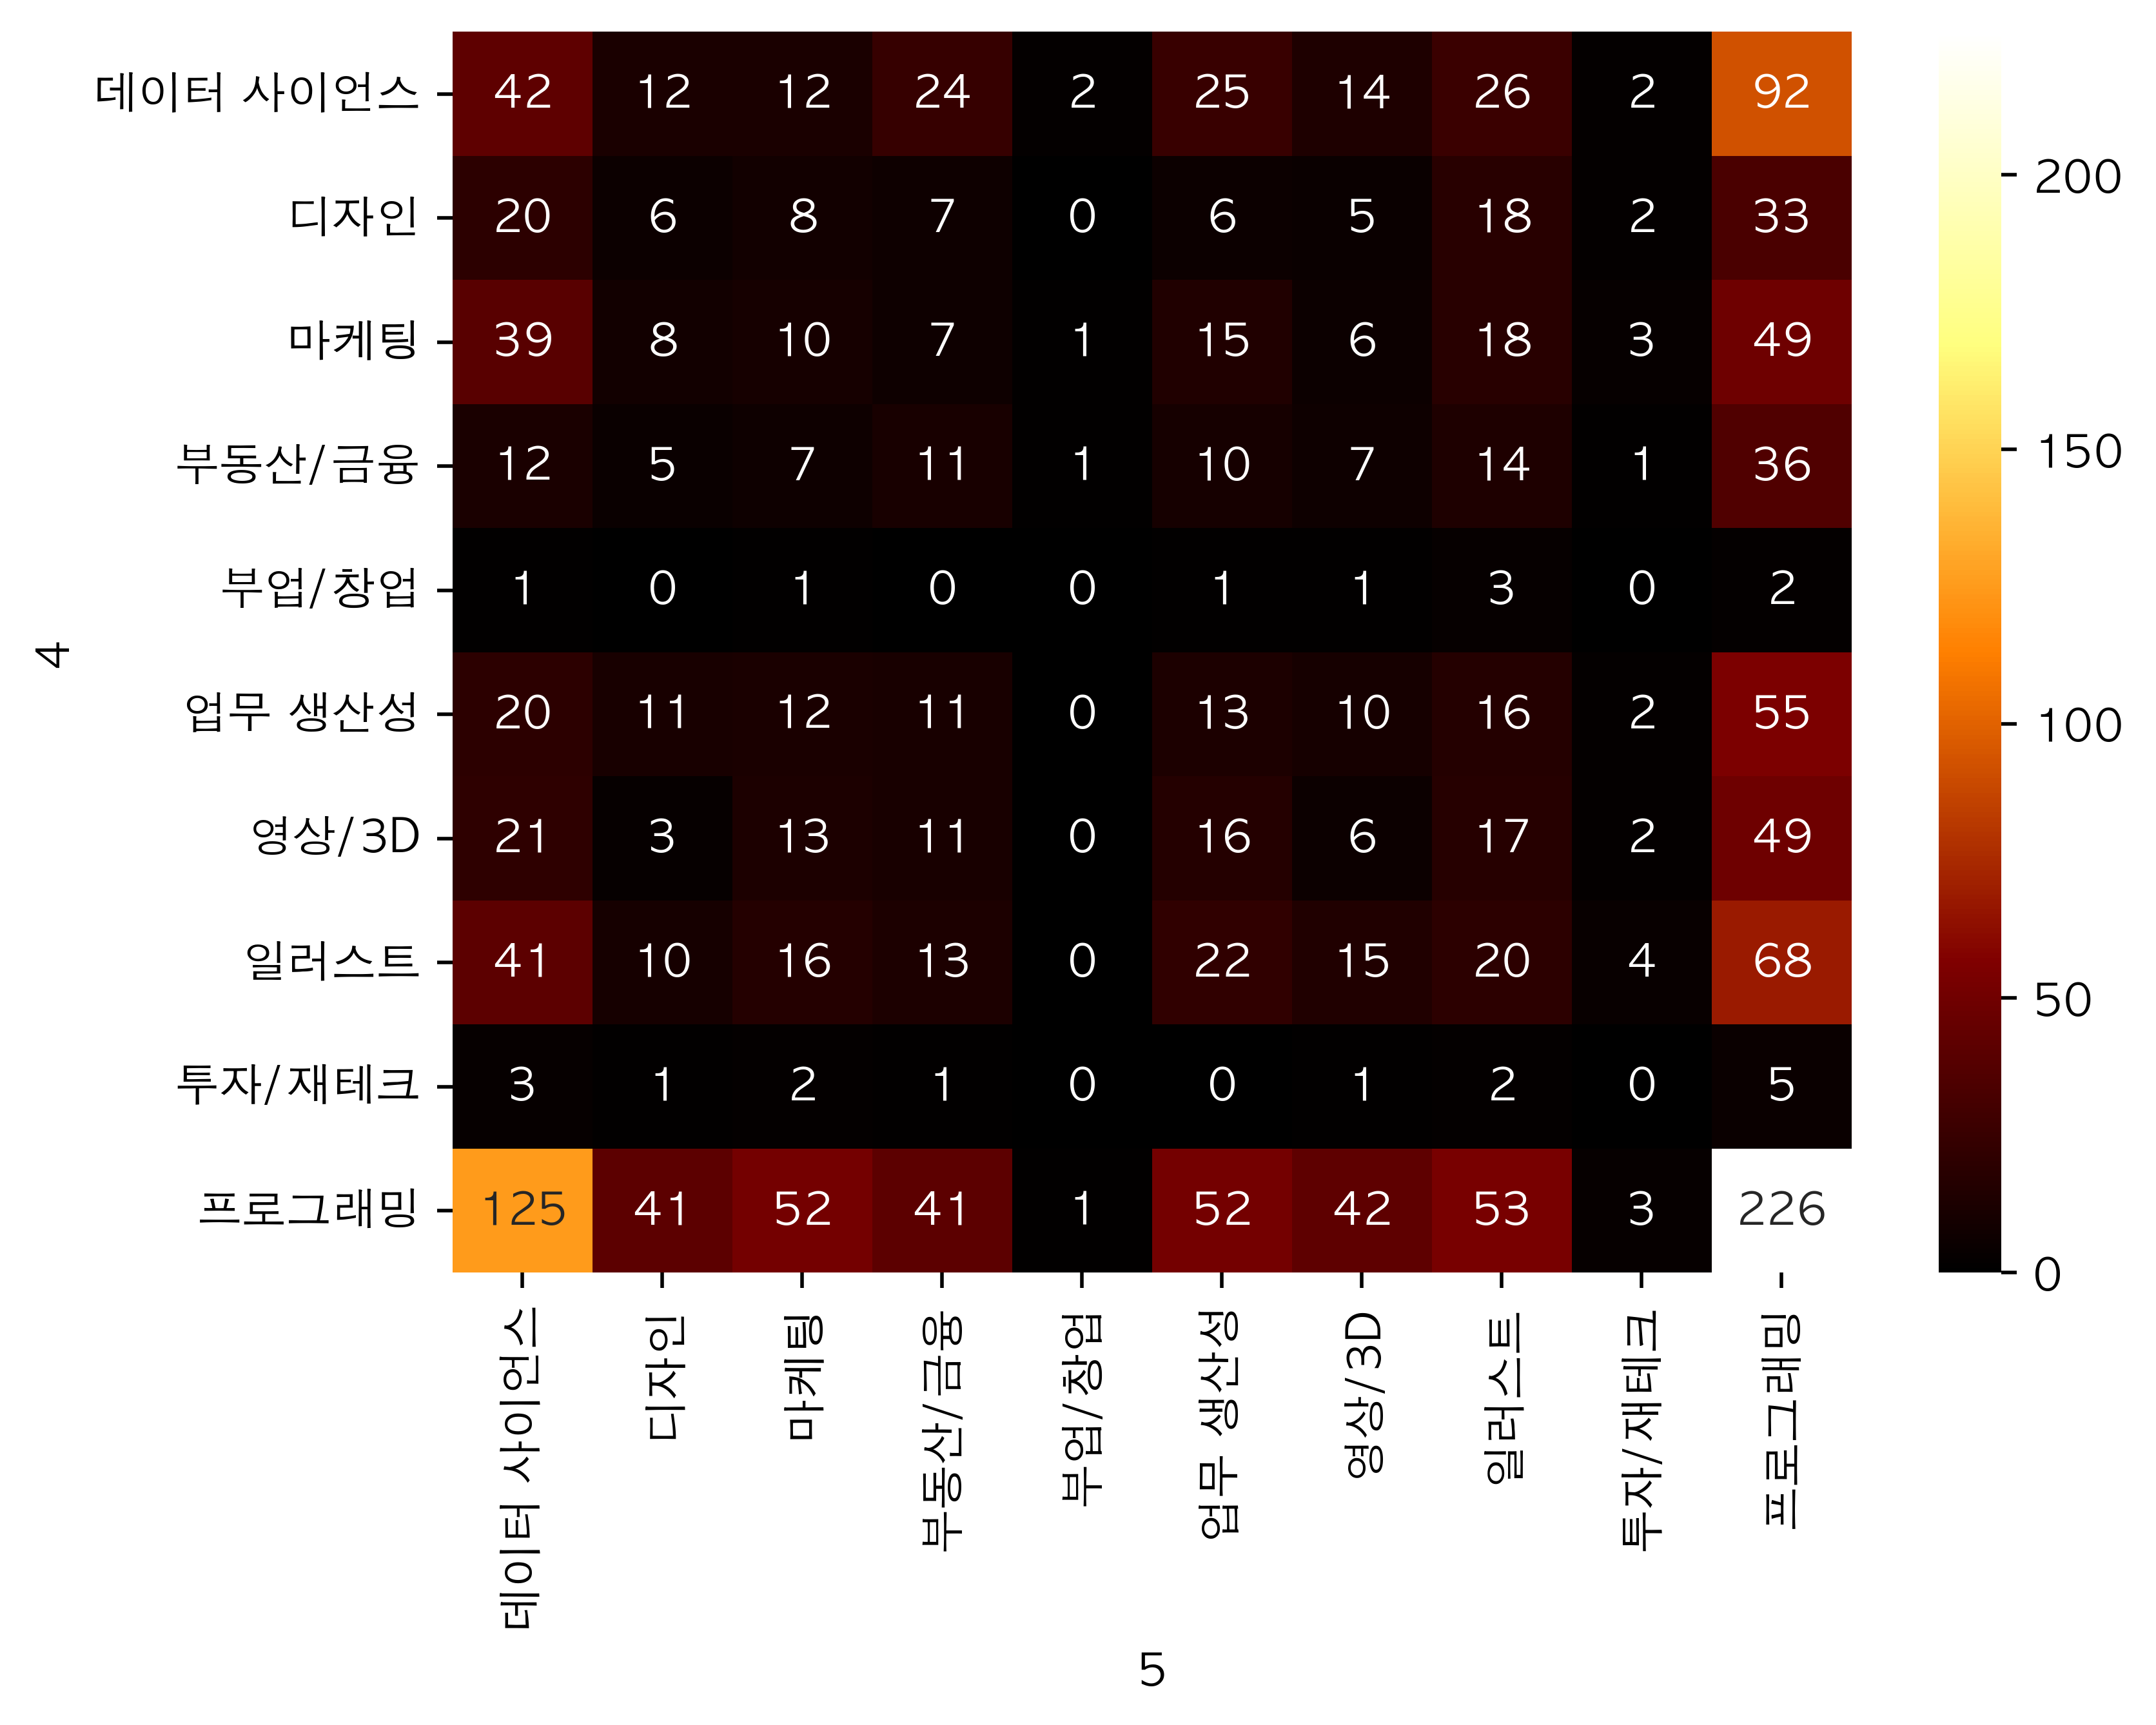

In [70]:
# 히트맵 그리기 (4 - >5)
df_ctg_pivot_4 = df_ctg.pivot_table(index = 4, columns = 5, aggfunc='size').fillna('0').astype('int')
df_ctg_pivot_4

sns.heatmap(df_ctg_pivot_4, annot=True, cmap = 'afmhot', fmt = 'g')

##### 2) 3회 이상 구매자와 2회 구매자의 구매 간격 비교

In [ ]:
## 구매횟수/구매간격에 관한 데이터프레임 제작

# 구매 간격을 day만 추출
term_2 = df_2_pivot['구매간격'].dt.days.values

df_term_2 = pd.DataFrame({'구매간격' : term_2})
df_term_2

,구매간격
0,121
1,253
2,62
3,193
4,127
...,...
24782,61
24783,17
24784,60
24785,158


In [ ]:
## 구매횟수/구매간격에 관한 데이터프레임 제작

# 구매 간격을 day만 추출
term_up3 = df_up3_pivot['구매간격'].dt.days.values

df_term_up3 = pd.DataFrame({'구매간격' : term_up3})
df_term_up3

,구매간격
0,195
1,15
2,94
3,97
4,85
...,...
18694,4
18695,11
18696,106
18697,4


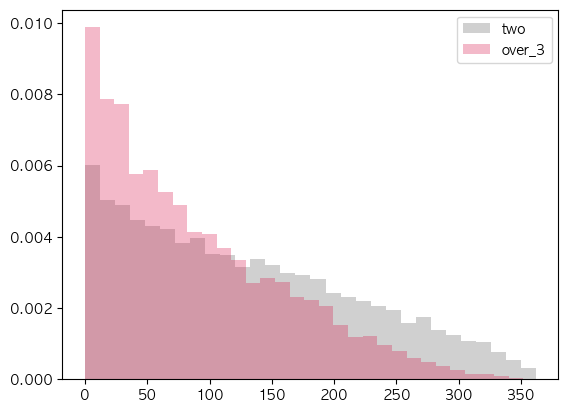

In [ ]:
# 구매간격 평균 시각화 (catplot)
colors = ['#D91A4D', '#666666'] # '#0D0D0D 너무 꺼매서 좀 회색으로 바꿈

plt.hist(df_term_2['구매간격'], color = '#666666', label = 'two', alpha = 0.3, bins = 30, density = True)
plt.hist(df_term_up3['구매간격'], color = '#D91A4D', label = 'over_3', alpha = 0.3, bins = 30, density = True)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Customers who pay three or more times have shorter first and second payment terms.')

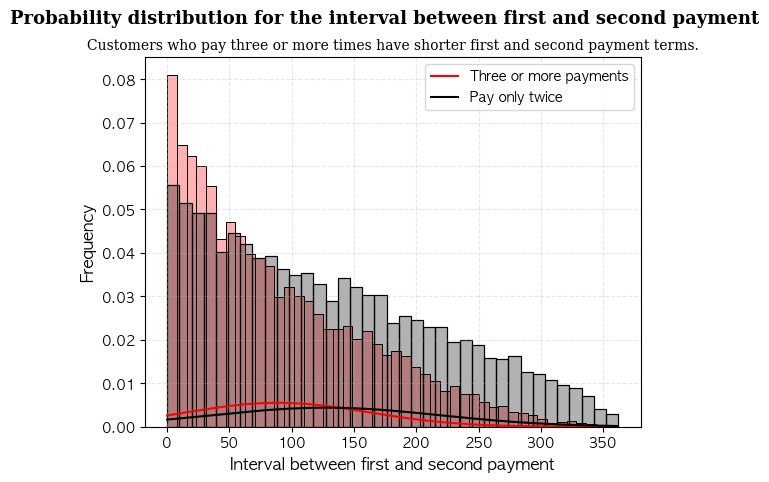

In [ ]:
import scipy.stats as stats


# 평균, 표준편차 구하기
mean_1 = np.mean(df_term_up3["구매간격"])  
std_1 = np.std(df_term_up3["구매간격"])  
mean_2 = np.mean(df_term_2["구매간격"])  
std_2 = np.std(df_term_2["구매간격"])  

# 확률밀도함수(PDF) 계산
pdf_1 = stats.norm.pdf(df_term_up3["구매간격"].sort_values(), mean_1, std_1)
pdf_2 = stats.norm.pdf(df_term_2["구매간격"].sort_values(), mean_2, std_2)

# 정규분포(+히스토그램) 그래프 작성
plt.plot(df_term_up3["구매간격"].sort_values(), pdf_1, color="Red", label="Three or more payments")
plt.plot(df_term_2["구매간격"].sort_values(), pdf_2, color="Black", label="Pay only twice")
sns.histplot(data = df_term_up3["구매간격"], color="Red",stat = "probability",alpha=0.3)
sns.histplot(data = df_term_2["구매간격"], color="Black",stat = "probability",alpha=0.3)
plt.legend()
plt.xlabel("Interval between first and second payment", size=12)
plt.ylabel("Frequency", size=12)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [7,5]  
plt.rcParams["figure.dpi"] = 500 
plt.suptitle('Probability distribution for the interval between first and second payment', fontfamily='serif', fontsize=13, fontweight='bold')
plt.title('Customers who pay three or more times have shorter first and second payment terms.', fontfamily='serif', fontsize=10)